In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('state_union')

[nltk_data] Downloading package punkt to /Users/ceciliali/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ceciliali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ceciliali/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ceciliali/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package state_union to
[nltk_data]     /Users/ceciliali/nltk_data...
[nltk_data]   Package state_union is already up-to-date!


True

In [2]:
# Read the script
script = pd.read_csv('endgame.csv')
script.head()

Unnamed: 0     character  \
0       14636  CLINT BARTON   
1       14637   LILA BARTON   
2       14638  CLINT BARTON   
3       14639  LAURA BARTON   
4       14640   LILA BARTON   

                                                line              movie  
0  Okay, you see where you’re going? Let’s work o...  Avengers: Endgame  
1                                         Why three?  Avengers: Endgame  
2       ‘Cause two’s not enough and four’s too much-  Avengers: Endgame  
3            You guys want mustard or mayo, or both?  Avengers: Endgame  
4                        Who puts mayo on a hot dog?  Avengers: Endgame

In [3]:
script = script.drop(['movie'], axis=1)
script.head()

Unnamed: 0     character                                               line
0       14636  CLINT BARTON  Okay, you see where you’re going? Let’s work o...
1       14637   LILA BARTON                                         Why three?
2       14638  CLINT BARTON       ‘Cause two’s not enough and four’s too much-
3       14639  LAURA BARTON            You guys want mustard or mayo, or both?
4       14640   LILA BARTON                        Who puts mayo on a hot dog?

In [4]:
script = script.rename(columns={'Unnamed: 0': 'lineNum'})
# Reset lineNum
script['lineNum'] = np.arange(1, len(script)+1)
script.head()

lineNum     character                                               line
0        1  CLINT BARTON  Okay, you see where you’re going? Let’s work o...
1        2   LILA BARTON                                         Why three?
2        3  CLINT BARTON       ‘Cause two’s not enough and four’s too much-
3        4  LAURA BARTON            You guys want mustard or mayo, or both?
4        5   LILA BARTON                        Who puts mayo on a hot dog?

In [5]:
# Cleaning the text
# Define a function to clean the text
# def clean(text):
# # Removes all special characters and numericals leaving the alphabets
#     text = re.sub('[^A-Za-z]+', ' ', text)
#     return text

# # Cleaning the text in the review column
# script['clean_line'] = script['line'].apply(clean)

# Remove punctuation 
script['clean_line'] = script['line'].str.replace('[^\w\s]','')
script.head()

/var/folders/mk/x97yxl6121bfr4x7_4d7xfyc0000gn/T/ipykernel_38977/3066775154.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  script['clean_line'] = script['line'].str.replace('[^\w\s]','')


lineNum     character                                               line  \
0        1  CLINT BARTON  Okay, you see where you’re going? Let’s work o...   
1        2   LILA BARTON                                         Why three?   
2        3  CLINT BARTON       ‘Cause two’s not enough and four’s too much-   
3        4  LAURA BARTON            You guys want mustard or mayo, or both?   
4        5   LILA BARTON                        Who puts mayo on a hot dog?   

                                          clean_line  
0  Okay you see where youre going Lets work on ho...  
1                                          Why three  
2           Cause twos not enough and fours too much  
3              You guys want mustard or mayo or both  
4                         Who puts mayo on a hot dog

In [6]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

# Tokenization and POS tagging
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

script['POS tagged'] = script['clean_line'].apply(token_stop_pos)
script.head()

lineNum     character                                               line  \
0        1  CLINT BARTON  Okay, you see where you’re going? Let’s work o...   
1        2   LILA BARTON                                         Why three?   
2        3  CLINT BARTON       ‘Cause two’s not enough and four’s too much-   
3        4  LAURA BARTON            You guys want mustard or mayo, or both?   
4        5   LILA BARTON                        Who puts mayo on a hot dog?   

                                          clean_line  \
0  Okay you see where youre going Lets work on ho...   
1                                          Why three   
2           Cause twos not enough and fours too much   
3              You guys want mustard or mayo or both   
4                         Who puts mayo on a hot dog   

                                          POS tagged  
0  [(Okay, n), (see, v), (youre, n), (going, v), ...  
1                                    [(three, None)]  
2  [(Cause, n), (twos, v), (enough, a), (fours, v...  
3    [(guys, v), (want, a), (mustard, n), (mayo, n)]  
4         [(puts, v), (mayo, n), (hot, a), (dog, n)]

In [7]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

script['Lemma'] = script['POS tagged'].apply(lemmatize)
script.head()

lineNum     character                                               line  \
0        1  CLINT BARTON  Okay, you see where you’re going? Let’s work o...   
1        2   LILA BARTON                                         Why three?   
2        3  CLINT BARTON       ‘Cause two’s not enough and four’s too much-   
3        4  LAURA BARTON            You guys want mustard or mayo, or both?   
4        5   LILA BARTON                        Who puts mayo on a hot dog?   

                                          clean_line  \
0  Okay you see where youre going Lets work on ho...   
1                                          Why three   
2           Cause twos not enough and fours too much   
3              You guys want mustard or mayo or both   
4                         Who puts mayo on a hot dog   

                                          POS tagged  \
0  [(Okay, n), (see, v), (youre, n), (going, v), ...   
1                                    [(three, None)]   
2  [(Cause, n), (twos, v), (enough, a), (fours, v...   
3    [(guys, v), (want, a), (mustard, n), (mayo, n)]   
4         [(puts, v), (mayo, n), (hot, a), (dog, n)]   

                                               Lemma  
0    Okay see youre go Lets work get Okay goodtip...  
1                                              three  
2                       Cause twos enough fours much  
3                              guy want mustard mayo  
4                                   put mayo hot dog

# Part 1: Text analysis

## Wordcloud

In [8]:
cloud = pd.DataFrame(script[['lineNum', 'line', 'Lemma']])
cloud

lineNum                                               line  \
0           1  Okay, you see where you’re going? Let’s work o...   
1           2                                         Why three?   
2           3       ‘Cause two’s not enough and four’s too much-   
3           4            You guys want mustard or mayo, or both?   
4           5                        Who puts mayo on a hot dog?   
...       ...                                                ...   
1083     1084                                          It isn’t.   
1084     1085                      Thank you.  I’ll try my best.   
1085     1086                             That’s why it’s yours.   
1086     1087                       You gonna tell me about her?   
1087     1088                       Nope.  I don’t think I will.   

                                                  Lemma  
0       Okay see youre go Lets work get Okay goodtip...  
1                                                 three  
2                          Cause twos enough fours much  
3                                 guy want mustard mayo  
4                                      put mayo hot dog  
...                                                 ...  
1083                                               isnt  
1084                                 Thank Ill try best  
1085                                              Thats  
1086                                        gon na tell  
1087                                    Nope dont think  

[1088 rows x 3 columns]

In [9]:
# Concatenate all lines
lines = " ".join(clean_line for clean_line in cloud['Lemma'])

In [10]:
len(lines)

35310

In [11]:
import gensim
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
len(STOPWORDS)

lines = remove_stopwords(lines)
len(lines)

28357

In [12]:
# Tokenize the words
from nltk.tokenize import word_tokenize
tokens  = word_tokenize(lines)
len(tokens)

4699

In [13]:
# Make all words small letters
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

In [14]:
from nltk.corpus import stopwords
stop_words   = (stopwords.words('english'))
len(stop_words)

filtered_words = [w for w in tokens if not w in stop_words]
len(filtered_words)

4699

In [15]:
import spacy
en = spacy.load('en_core_web_sm')
spacy_stop_words = en.Defaults.stop_words
len(spacy_stop_words)

filtered_words2 = [w for w in filtered_words if not w in spacy_stop_words]
len(filtered_words2)

4574

In [16]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
len(ENGLISH_STOP_WORDS)

filtered_words3 = [w for w in filtered_words2 if not w in ENGLISH_STOP_WORDS]
len(filtered_words3)

4564

In [17]:
# Manually input extra words
extra_words=['im', 'get', 'go', 'know', 'dont', 'youre', 'na', 'think', 'right', 'yeah', 'thats', 'tell', 'gon',
            'okay', 'hey', 'whats', 'youll', 'ill', 'didnt', 'hes', 'wan', 'ive', 'theres', 'id', 'uh', 'oh', 'look',
            'want', 'need', 'let', 'ta']

filtered_words4 = [w for w in filtered_words3 if not w in extra_words]
filtered_words4[1:10]

['work',
 'goodtip',
 'downbow',
 'arm',
 'outthree',
 'finger',
 'cause',
 'twos',
 'fours']

In [18]:
len(filtered_words4)

3735

In [19]:
string_text = ' '.join(filtered_words4)   

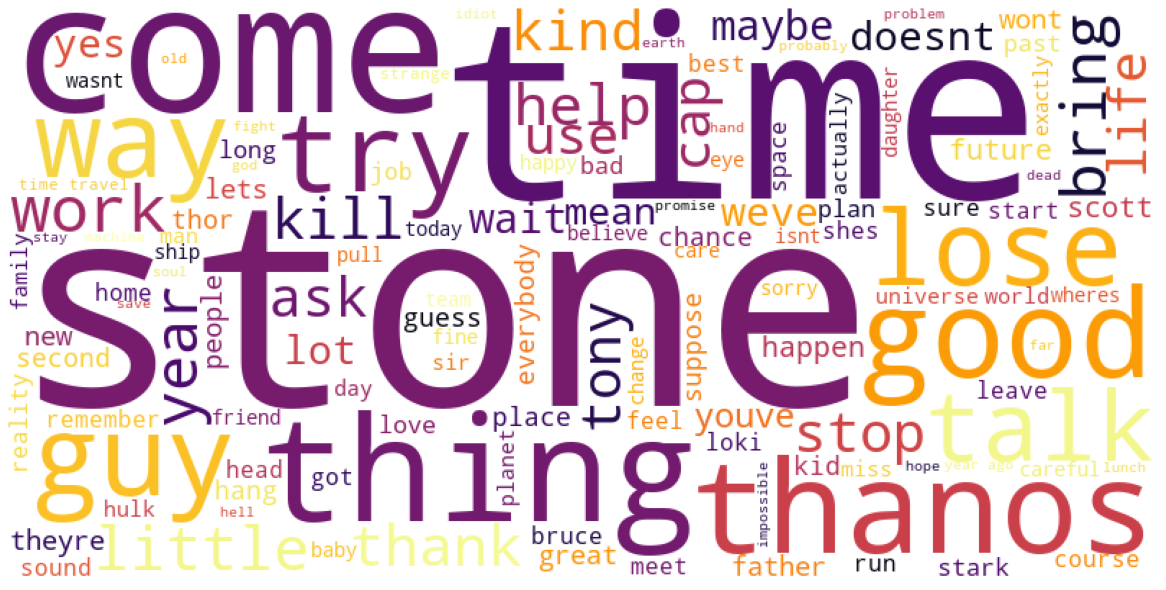

In [20]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(max_font_size=200, min_font_size=10, max_words=150, background_color="white",
                      colormap='inferno',
                     width=800, height=400, prefer_horizontal=0.99).generate(string_text)
                                                                            
# Display the generated image:
plt.figure(figsize = (16, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [21]:
freq = nltk.FreqDist(filtered_words4)

freq.most_common(20)

[('stone', 61),
 ('time', 60),
 ('like', 51),
 ('come', 39),
 ('thanos', 32),
 ('thing', 31),
 ('good', 30),
 ('try', 25),
 ('way', 24),
 ('year', 24),
 ('lose', 23),
 ('talk', 23),
 ('guy', 22),
 ('work', 21),
 ('bring', 19),
 ('little', 18),
 ('help', 18),
 ('kill', 17),
 ('stop', 17),
 ('ask', 16)]

## Network to analysis characters' relationship


In [22]:
network = script.copy()
network

lineNum     character  \
0           1  CLINT BARTON   
1           2   LILA BARTON   
2           3  CLINT BARTON   
3           4  LAURA BARTON   
4           5   LILA BARTON   
...       ...           ...   
1083     1084  STEVE ROGERS   
1084     1085    SAM WILSON   
1085     1086  STEVE ROGERS   
1086     1087    SAM WILSON   
1087     1088  STEVE ROGERS   

                                                   line  \
0     Okay, you see where you’re going? Let’s work o...   
1                                            Why three?   
2          ‘Cause two’s not enough and four’s too much-   
3               You guys want mustard or mayo, or both?   
4                           Who puts mayo on a hot dog?   
...                                                 ...   
1083                                          It isn’t.   
1084                      Thank you.  I’ll try my best.   
1085                             That’s why it’s yours.   
1086                       You gonna tell me about her?   
1087                       Nope.  I don’t think I will.   

                                             clean_line  \
0     Okay you see where youre going Lets work on ho...   
1                                             Why three   
2              Cause twos not enough and fours too much   
3                 You guys want mustard or mayo or both   
4                            Who puts mayo on a hot dog   
...                                                 ...   
1083                                            It isnt   
1084                         Thank you  Ill try my best   
1085                                Thats why its yours   
1086                        You gonna tell me about her   
1087                          Nope  I dont think I will   

                                             POS tagged  \
0     [(Okay, n), (see, v), (youre, n), (going, v), ...   
1                                       [(three, None)]   
2     [(Cause, n), (twos, v), (enough, a), (fours, v...   
3       [(guys, v), (want, a), (mustard, n), (mayo, n)]   
4            [(puts, v), (mayo, n), (hot, a), (dog, n)]   
...                                                 ...   
1083                                        [(isnt, v)]   
1084        [(Thank, n), (Ill, v), (try, v), (best, a)]   
1085                                       [(Thats, n)]   
1086                  [(gon, v), (na, None), (tell, v)]   
1087                 [(Nope, n), (dont, v), (think, v)]   

                                                  Lemma  
0       Okay see youre go Lets work get Okay goodtip...  
1                                                 three  
2                          Cause twos enough fours much  
3                                 guy want mustard mayo  
4                                      put mayo hot dog  
...                                                 ...  
1083                                               isnt  
1084                                 Thank Ill try best  
1085                                              Thats  
1086                                        gon na tell  
1087                                    Nope dont think  

[1088 rows x 6 columns]

In [23]:
# Combine character and line 
network['char_line'] = network['character'] + network['Lemma']
network

lineNum     character  \
0           1  CLINT BARTON   
1           2   LILA BARTON   
2           3  CLINT BARTON   
3           4  LAURA BARTON   
4           5   LILA BARTON   
...       ...           ...   
1083     1084  STEVE ROGERS   
1084     1085    SAM WILSON   
1085     1086  STEVE ROGERS   
1086     1087    SAM WILSON   
1087     1088  STEVE ROGERS   

                                                   line  \
0     Okay, you see where you’re going? Let’s work o...   
1                                            Why three?   
2          ‘Cause two’s not enough and four’s too much-   
3               You guys want mustard or mayo, or both?   
4                           Who puts mayo on a hot dog?   
...                                                 ...   
1083                                          It isn’t.   
1084                      Thank you.  I’ll try my best.   
1085                             That’s why it’s yours.   
1086                       You gonna tell me about her?   
1087                       Nope.  I don’t think I will.   

                                             clean_line  \
0     Okay you see where youre going Lets work on ho...   
1                                             Why three   
2              Cause twos not enough and fours too much   
3                 You guys want mustard or mayo or both   
4                            Who puts mayo on a hot dog   
...                                                 ...   
1083                                            It isnt   
1084                         Thank you  Ill try my best   
1085                                Thats why its yours   
1086                        You gonna tell me about her   
1087                          Nope  I dont think I will   

                                             POS tagged  \
0     [(Okay, n), (see, v), (youre, n), (going, v), ...   
1                                       [(three, None)]   
2     [(Cause, n), (twos, v), (enough, a), (fours, v...   
3       [(guys, v), (want, a), (mustard, n), (mayo, n)]   
4            [(puts, v), (mayo, n), (hot, a), (dog, n)]   
...                                                 ...   
1083                                        [(isnt, v)]   
1084        [(Thank, n), (Ill, v), (try, v), (best, a)]   
1085                                       [(Thats, n)]   
1086                  [(gon, v), (na, None), (tell, v)]   
1087                 [(Nope, n), (dont, v), (think, v)]   

                                                  Lemma  \
0       Okay see youre go Lets work get Okay goodtip...   
1                                                 three   
2                          Cause twos enough fours much   
3                                 guy want mustard mayo   
4                                      put mayo hot dog   
...                                                 ...   
1083                                               isnt   
1084                                 Thank Ill try best   
1085                                              Thats   
1086                                        gon na tell   
1087                                    Nope dont think   

                                              char_line  
0     CLINT BARTON  Okay see youre go Lets work get ...  
1                                    LILA BARTON  three  
2            CLINT BARTON  Cause twos enough fours much  
3                   LAURA BARTON  guy want mustard mayo  
4                         LILA BARTON  put mayo hot dog  
...                                                 ...  
1083                                 STEVE ROGERS  isnt  
1084                     SAM WILSON  Thank Ill try best  
1085                                STEVE ROGERS  Thats  
1086                            SAM WILSON  gon na tell  
1087                      STEVE ROGERS  Nope dont think  

[1088 rows x 7 columns]

In [24]:
# List of characters
network['character_word_by_word'] = network['character'].str.split(' ')
network['character_word_by_word'] = tuple(list(network['character_word_by_word']))
network

lineNum     character  \
0           1  CLINT BARTON   
1           2   LILA BARTON   
2           3  CLINT BARTON   
3           4  LAURA BARTON   
4           5   LILA BARTON   
...       ...           ...   
1083     1084  STEVE ROGERS   
1084     1085    SAM WILSON   
1085     1086  STEVE ROGERS   
1086     1087    SAM WILSON   
1087     1088  STEVE ROGERS   

                                                   line  \
0     Okay, you see where you’re going? Let’s work o...   
1                                            Why three?   
2          ‘Cause two’s not enough and four’s too much-   
3               You guys want mustard or mayo, or both?   
4                           Who puts mayo on a hot dog?   
...                                                 ...   
1083                                          It isn’t.   
1084                      Thank you.  I’ll try my best.   
1085                             That’s why it’s yours.   
1086                       You gonna tell me about her?   
1087                       Nope.  I don’t think I will.   

                                             clean_line  \
0     Okay you see where youre going Lets work on ho...   
1                                             Why three   
2              Cause twos not enough and fours too much   
3                 You guys want mustard or mayo or both   
4                            Who puts mayo on a hot dog   
...                                                 ...   
1083                                            It isnt   
1084                         Thank you  Ill try my best   
1085                                Thats why its yours   
1086                        You gonna tell me about her   
1087                          Nope  I dont think I will   

                                             POS tagged  \
0     [(Okay, n), (see, v), (youre, n), (going, v), ...   
1                                       [(three, None)]   
2     [(Cause, n), (twos, v), (enough, a), (fours, v...   
3       [(guys, v), (want, a), (mustard, n), (mayo, n)]   
4            [(puts, v), (mayo, n), (hot, a), (dog, n)]   
...                                                 ...   
1083                                        [(isnt, v)]   
1084        [(Thank, n), (Ill, v), (try, v), (best, a)]   
1085                                       [(Thats, n)]   
1086                  [(gon, v), (na, None), (tell, v)]   
1087                 [(Nope, n), (dont, v), (think, v)]   

                                                  Lemma  \
0       Okay see youre go Lets work get Okay goodtip...   
1                                                 three   
2                          Cause twos enough fours much   
3                                 guy want mustard mayo   
4                                      put mayo hot dog   
...                                                 ...   
1083                                               isnt   
1084                                 Thank Ill try best   
1085                                              Thats   
1086                                        gon na tell   
1087                                    Nope dont think   

                                              char_line character_word_by_word  
0     CLINT BARTON  Okay see youre go Lets work get ...        [CLINT, BARTON]  
1                                    LILA BARTON  three         [LILA, BARTON]  
2            CLINT BARTON  Cause twos enough fours much        [CLINT, BARTON]  
3                   LAURA BARTON  guy want mustard mayo        [LAURA, BARTON]  
4                         LILA BARTON  put mayo hot dog         [LILA, BARTON]  
...                                                 ...                    ...  
1083                                 STEVE ROGERS  isnt        [STEVE, ROGERS]  
1084                     SAM WILSON  Thank Ill try best          [SAM, WILSON]  
1085                                STEVE ROGERS  Thats        [STEV

In [25]:
# Replace space with underscore for characters
network['character'] = network['character'].str.replace(" ", "_")
network

lineNum     character  \
0           1  CLINT_BARTON   
1           2   LILA_BARTON   
2           3  CLINT_BARTON   
3           4  LAURA_BARTON   
4           5   LILA_BARTON   
...       ...           ...   
1083     1084  STEVE_ROGERS   
1084     1085    SAM_WILSON   
1085     1086  STEVE_ROGERS   
1086     1087    SAM_WILSON   
1087     1088  STEVE_ROGERS   

                                                   line  \
0     Okay, you see where you’re going? Let’s work o...   
1                                            Why three?   
2          ‘Cause two’s not enough and four’s too much-   
3               You guys want mustard or mayo, or both?   
4                           Who puts mayo on a hot dog?   
...                                                 ...   
1083                                          It isn’t.   
1084                      Thank you.  I’ll try my best.   
1085                             That’s why it’s yours.   
1086                       You gonna tell me about her?   
1087                       Nope.  I don’t think I will.   

                                             clean_line  \
0     Okay you see where youre going Lets work on ho...   
1                                             Why three   
2              Cause twos not enough and fours too much   
3                 You guys want mustard or mayo or both   
4                            Who puts mayo on a hot dog   
...                                                 ...   
1083                                            It isnt   
1084                         Thank you  Ill try my best   
1085                                Thats why its yours   
1086                        You gonna tell me about her   
1087                          Nope  I dont think I will   

                                             POS tagged  \
0     [(Okay, n), (see, v), (youre, n), (going, v), ...   
1                                       [(three, None)]   
2     [(Cause, n), (twos, v), (enough, a), (fours, v...   
3       [(guys, v), (want, a), (mustard, n), (mayo, n)]   
4            [(puts, v), (mayo, n), (hot, a), (dog, n)]   
...                                                 ...   
1083                                        [(isnt, v)]   
1084        [(Thank, n), (Ill, v), (try, v), (best, a)]   
1085                                       [(Thats, n)]   
1086                  [(gon, v), (na, None), (tell, v)]   
1087                 [(Nope, n), (dont, v), (think, v)]   

                                                  Lemma  \
0       Okay see youre go Lets work get Okay goodtip...   
1                                                 three   
2                          Cause twos enough fours much   
3                                 guy want mustard mayo   
4                                      put mayo hot dog   
...                                                 ...   
1083                                               isnt   
1084                                 Thank Ill try best   
1085                                              Thats   
1086                                        gon na tell   
1087                                    Nope dont think   

                                              char_line character_word_by_word  
0     CLINT BARTON  Okay see youre go Lets work get ...        [CLINT, BARTON]  
1                                    LILA BARTON  three         [LILA, BARTON]  
2            CLINT BARTON  Cause twos enough fours much        [CLINT, BARTON]  
3                   LAURA BARTON  guy want mustard mayo        [LAURA, BARTON]  
4                         LILA BARTON  put mayo hot dog         [LILA, BARTON]  
...                                                 ...                    ...  
1083                                 STEVE ROGERS  isnt        [STEVE, ROGERS]  
1084                     SAM WILSON  Thank Ill try best          [SAM, WILSON]  
1085                                STEVE ROGERS  Thats        [STEV

In [26]:
# Distinct characters
character_list = network['character'].unique()
char = character_list.tolist()
type(char)

list

In [27]:
numCharacters = len(char)
numCharacters

70

In [28]:
# Dictionary for characters
character_map = {}
for i in range(numCharacters):
    character_map[i] = char[i]

character_map

{0: 'CLINT_BARTON',
 1: 'LILA_BARTON',
 2: 'LAURA_BARTON',
 3: 'TONY_STARK',
 4: 'NEBULA',
 5: 'STEVE_ROGERS',
 6: 'PEPPER_POTTS',
 7: 'JAMES_RHODES',
 8: 'NATASHA_ROMANOFF',
 9: 'CAROL_DANVERS',
 10: 'ROCKET',
 11: 'BRUCE_BANNER',
 12: 'THOR',
 13: 'THANOS',
 14: 'GRIEVING_MAN',
 15: 'AVENGERS_JIMMY',
 16: 'OLDER_MAN',
 17: 'SCOTT_LANG',
 18: 'CASSIE_LANG',
 19: 'OKOYE',
 20: 'MORGAN_STARK',
 21: 'AVENGERS_KID',
 22: 'FRIDAY',
 23: 'VALKYRIE',
 24: 'KORG',
 25: 'AKIHIKO',
 26: 'RONIN',
 27: 'ANCIENT_ONE',
 28: 'MAIDEN',
 29: 'JANE_FOSTER',
 30: 'FRIGGA',
 31: 'GAMORA',
 32: 'BAD_NEBULA',
 33: 'LOKI',
 34: 'A1_NATASHA',
 35: 'A1_STEVE',
 36: 'A1_CLINT_BARTON',
 37: 'BROCK_RUMLOW',
 38: 'LOKI/STEVE',
 39: 'A1_THOR',
 40: 'A1_TONY',
 41: 'A1_HULK',
 42: 'JAPSER_SITWELL',
 43: 'ALEXANDER_PIERCE',
 44: 'SECURITY',
 45: 'EBONY_MAW',
 46: 'PETER_QUILL',
 47: 'STAN_LEE',
 48: 'FEMALE_SHIELD_AGENT',
 49: 'HOWARD_STARK',
 50: 'HANK_PYM',
 51: 'M.P.',
 52: 'PEGGY_CARTER',
 53: 'MALE_AGENT',
 54:

In [29]:
# Combine char_line columns into a string
all_char_line = " ".join(char_line for char_line in network['char_line'])
# all_char_line

# # Tokenize all_char_line
# char_line_token  = word_tokenize(all_char_line)

In [30]:
token_exception = []
for i in range(len(network)):
    token_exception.append(tuple(network.loc[i, 'character_word_by_word']))

In [31]:
# Tokenize all_char_line except for characters
from nltk.tokenize import MWETokenizer
tokenizer=MWETokenizer(token_exception)

char_line_token = tokenizer.tokenize(all_char_line.split())

In [32]:
# Find occurence of each character 
k=0;
numOccurrences=pd.Series(range(numCharacters))
for character in character_list:
    numOccurrences[k] =char_line_token.count(character)
    k=k+1

In [33]:
numOccurrences

0      45
1       3
2       2
3     139
4      33
     ... 
65      2
66      4
67      1
68      1
69      2
Length: 70, dtype: int64

Text(0, 0.5, 'Number of occurence')

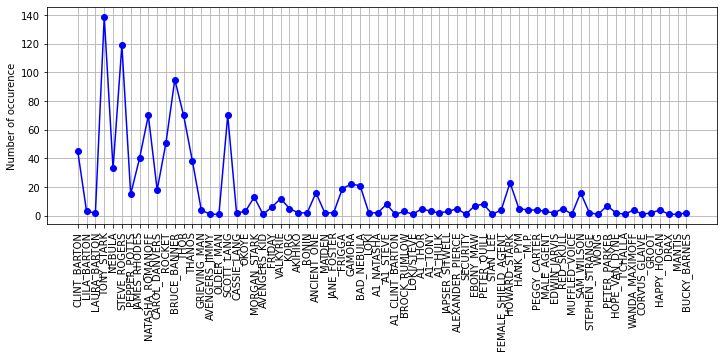

In [34]:
fig   = plt.figure(figsize = (12, 4))
plt.style.use('default')
ax    = fig.add_subplot(111)
plt.plot(numOccurrences,'b-o')
plt.xticks(np.arange(0,numCharacters),character_list)
plt.grid()
ax.tick_params(axis='x', rotation=90, labelsize=10)
plt.ylabel('Number of occurence')

In [35]:
# Create ndarray with zeros for position of each character
positions_characters = [] 
for i in range(len(numOccurrences)):
    a = np.zeros(numOccurrences[i])  
    positions_characters.append(a)     

In [36]:
numCharacters

70

In [37]:
# Iterate over every character and find the position 
for j in range(numCharacters):
    positions_current=[]
    for i in range(len(char_line_token)):
        if char_line_token[i]==character_list[j]:
#             print(i)
            positions_current.append(i)
#     print(positions_current)
    positions_characters[j][:]=positions_current   

In [38]:
#positions_characters[1]

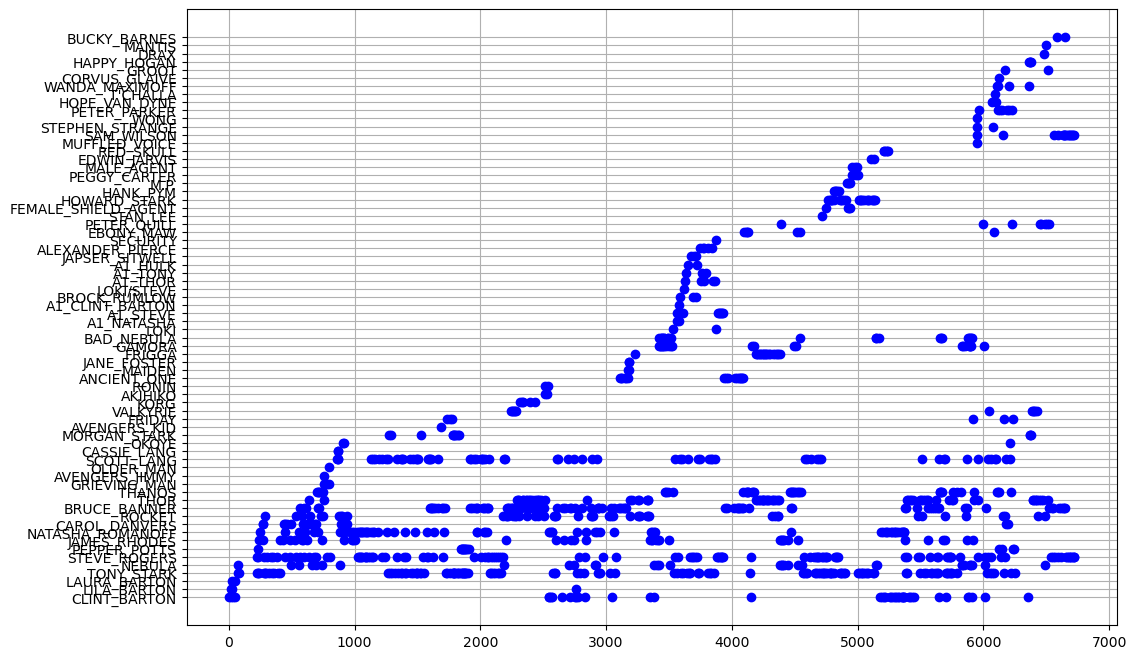

In [39]:
fig   = plt.figure(figsize = (12, 8))
ax    = fig.add_subplot(111)
for j in range(0,numCharacters):
    plt.plot( positions_characters[j],j*np.ones(numOccurrences[j]),'bo')
    
plt.yticks(np.arange(0,numCharacters),character_list)
plt.grid()

In [40]:
# Find the distance between characters
interactions_characters = np.zeros((numCharacters,numCharacters))
for i in range(numCharacters-1):
    for j in range(i+1,numCharacters):
        # A pair of characters (i,j) has been selected, 
        # now iterate over their locations and find the distances
        #print(i,j)
        for loc_i in range(numOccurrences[i]):
            for loc_j in range(numOccurrences[j]):
                # find distance
                dist = abs(positions_characters[i][loc_i]-positions_characters[j][loc_j])
                #if distance is small, then record interaction
                if (dist<200):
                    interactions_characters[i,j]=interactions_characters[i,j]+1
                    interactions_characters[j,i]=interactions_characters[j,i]+1
                #print(i,j, positions_characters[i][loc_i],positions_characters[j][loc_j])
                #print(i,j, loc_i,loc_j,dist)
        
#positions_characters
#interactions_characters

In [41]:
interactions_characters.shape

(70, 70)

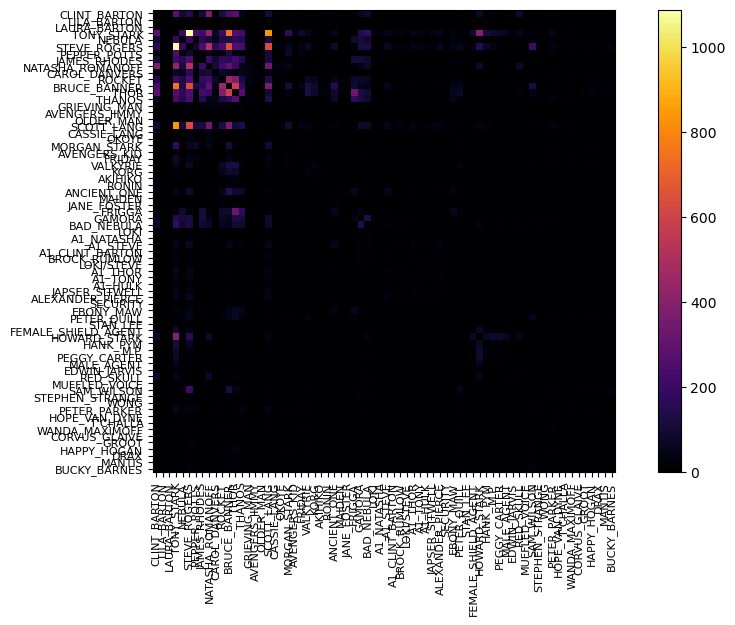

In [42]:
import matplotlib
fig2 = plt.figure(figsize = (11, 6)) 
ax2    = fig2.add_subplot(111)
plt.imshow(interactions_characters,cmap=matplotlib.cm.inferno) 
plt.colorbar()
plt.yticks(np.arange(0,numCharacters),character_list)
plt.xticks(np.arange(0,numCharacters),character_list)
ax2.tick_params(axis='x', rotation=90, labelsize=8)
ax2.tick_params(axis='y', labelsize=8)

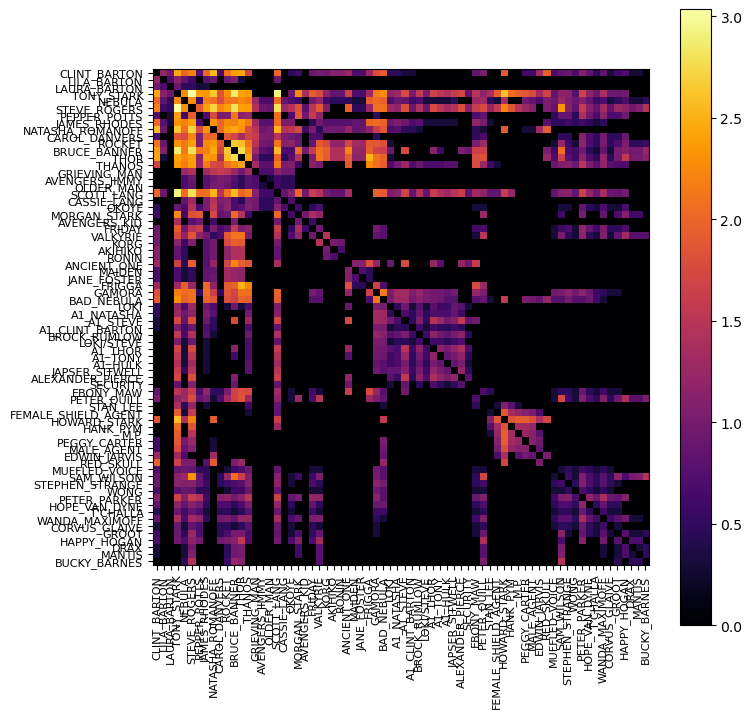

In [43]:
#Take log of the graph
fig3 = plt.figure(figsize = (8, 8)) 
ax3    = fig3.add_subplot(111)
plt.imshow(np.log10(1+interactions_characters),cmap=matplotlib.cm.inferno)
plt.colorbar()
plt.yticks(np.arange(0,numCharacters),character_list)
plt.xticks(np.arange(0,numCharacters),character_list)
ax3.tick_params(axis='x', rotation=90, labelsize=8)
ax3.tick_params(axis='y', labelsize=8)

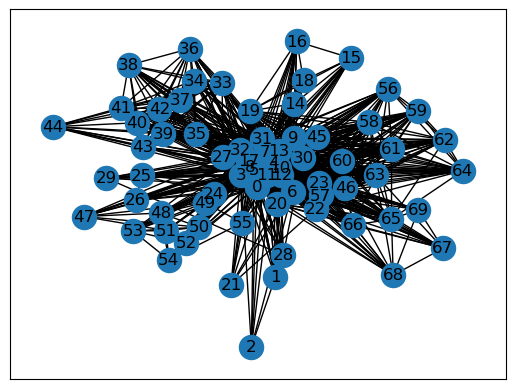

In [44]:
import networkx as nx
G1=nx.from_numpy_matrix(interactions_characters)
nx.draw_networkx(G1)

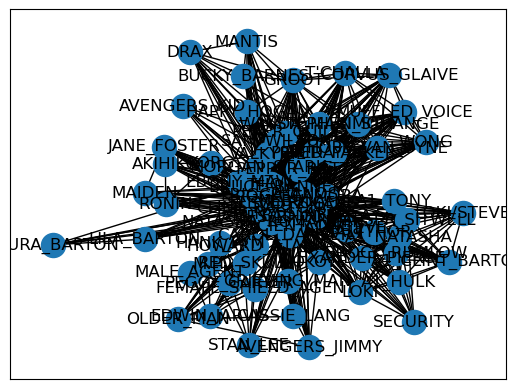

In [45]:
H1 = nx.relabel_nodes(G1, character_map)
nx.draw_networkx(H1)

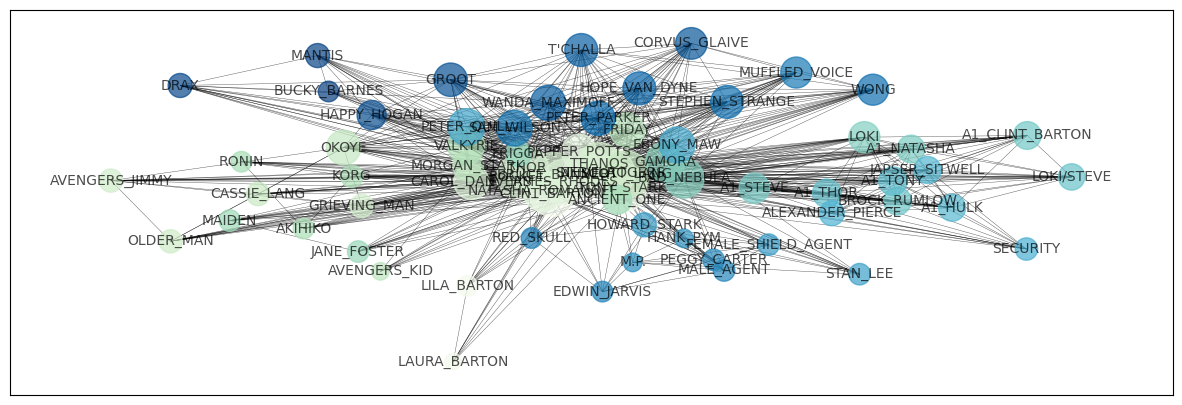

In [46]:
# Change size of node according to degree (number of neighbours)
kdeg  = G1.degree()
fig   = plt.figure(figsize = (15, 5))
ax1   = plt.subplot(111)
H1    = nx.relabel_nodes(G1, character_map)
nx.draw_networkx(H1, node_color=range(numCharacters),font_color='black',width=0.3,alpha=0.7, 
                 font_size=10, cmap=matplotlib.cm.GnBu
                 ,node_size =[20*val for (node,val) in kdeg])

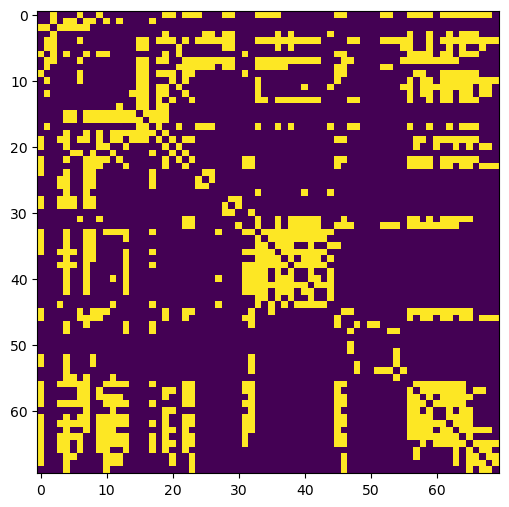

In [47]:
# Adjacency matrix withfcases less than a certain number of occurences
plt.figure(figsize = (11, 6)) 
plt.imshow((interactions_characters<=10)&(interactions_characters>0)) 

In [48]:
# Delete interactions with less than 30 occurences
interactions_characters[interactions_characters<=30]=0
G2=nx.from_numpy_matrix(interactions_characters)

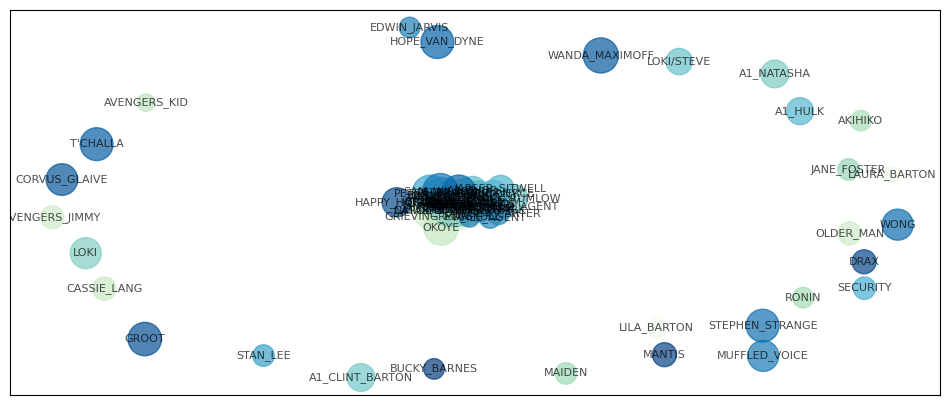

In [49]:
fig   = plt.figure(figsize = (12, 5))
ax1   = plt.subplot(111)
H2    = nx.relabel_nodes(nx.from_numpy_matrix(np.log10(1+interactions_characters)), character_map)
nx.draw_networkx(H2, node_color=range(numCharacters),font_color='black',width=0.3,alpha=0.7, font_size=8, cmap=matplotlib.cm.GnBu,node_size =[20*val for (node,val) in kdeg])


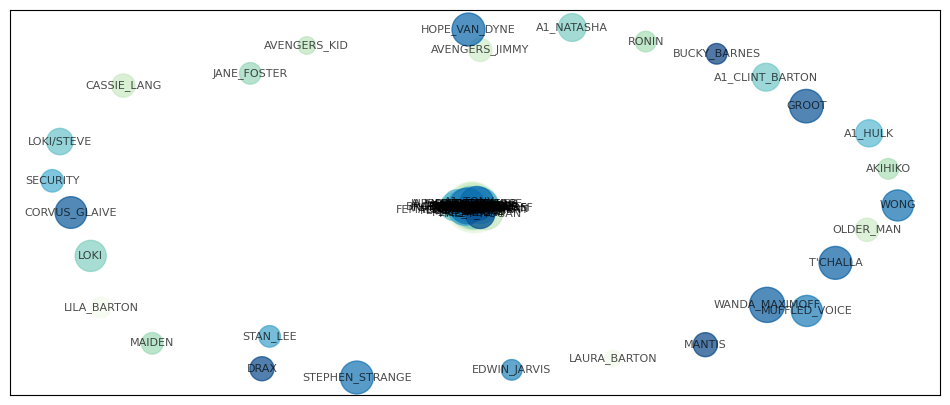

In [50]:
fig   = plt.figure(figsize = (12, 5))
ax1   = plt.subplot(111)
H2    = nx.relabel_nodes(nx.from_numpy_matrix(interactions_characters), character_map)
nx.draw_networkx(H2, node_color=range(numCharacters),font_color='black',width=0.3,alpha=0.7, 
                 font_size=8, cmap=matplotlib.cm.GnBu,node_size =[20*val for (node,val) in kdeg])

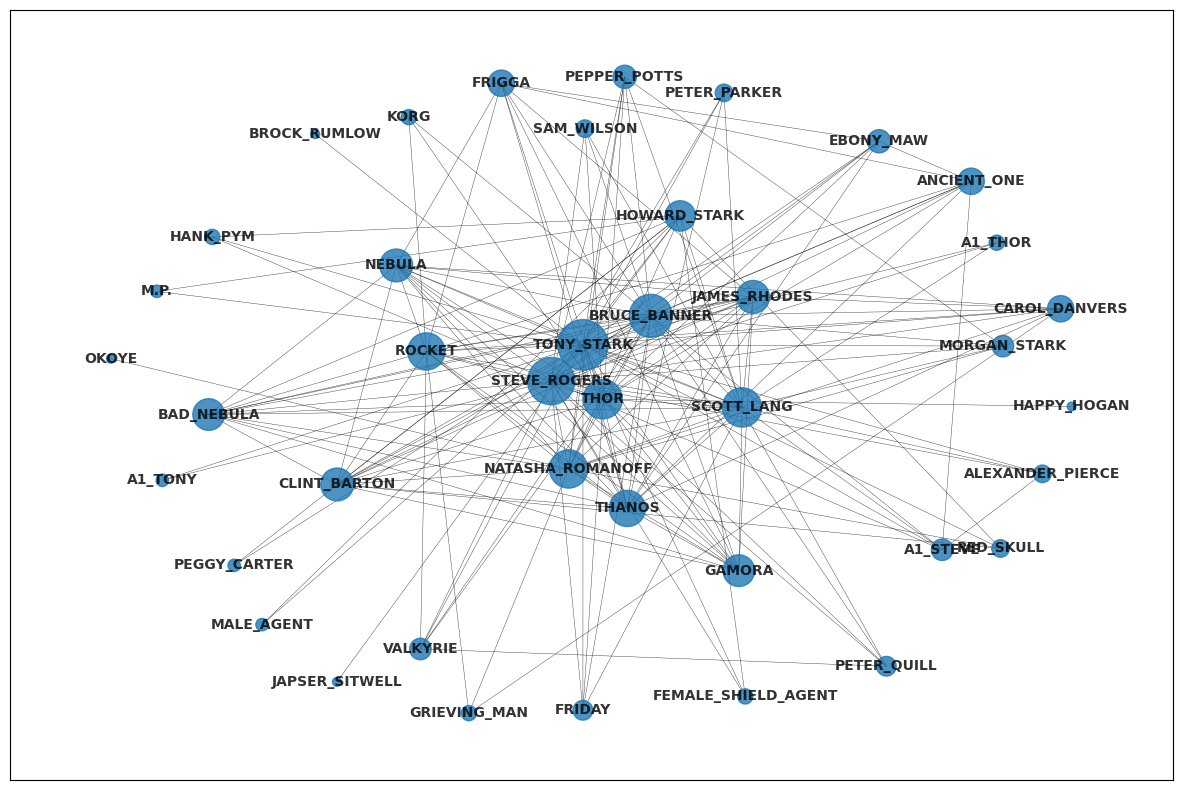

In [51]:
# Only show the largest subset
largestSubgraph = max(nx.connected_components(G2), key = len)
largest_component = G2.subgraph(largestSubgraph)
H3 = nx.relabel_nodes(largest_component, character_map)

pos = nx.spring_layout(H3, k=10)

fig = plt.figure(figsize=(15, 10))
largest_kdeg  = H3.degree()
d = dict(largest_kdeg)

nx.draw_networkx(H3, pos=pos, font_color='black',width=0.3,alpha=0.8, font_weight='bold',
                 font_size=10, cmap=matplotlib.cm.GnBu, node_size =[40*val for (node,val) in largest_kdeg])

In [52]:
type(largest_component)

networkx.classes.graph.Graph

In [53]:
degree_centrality = nx.degree_centrality(H1)
nx.set_node_attributes(H1,degree_centrality,'dc')
centralityValues=[v for v in degree_centrality.values()]

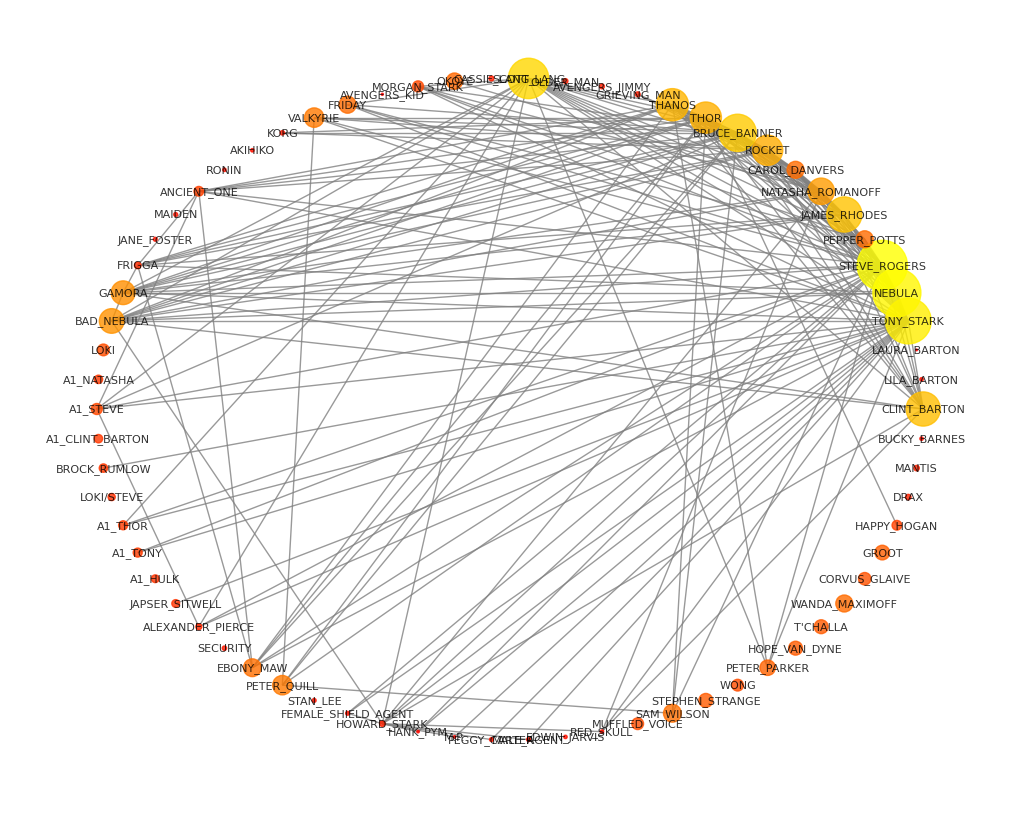

In [54]:
fig   = plt.figure(figsize = (10, 8))
nx.draw_circular(H2, node_color=centralityValues,font_color='black',alpha=0.8,edge_color='gray',
#                  edge_weight=5,
                 font_size=8,with_labels=True, cmap=matplotlib.cm.autumn,
                 node_size=[1500*(v**3) for v in degree_centrality.values()])

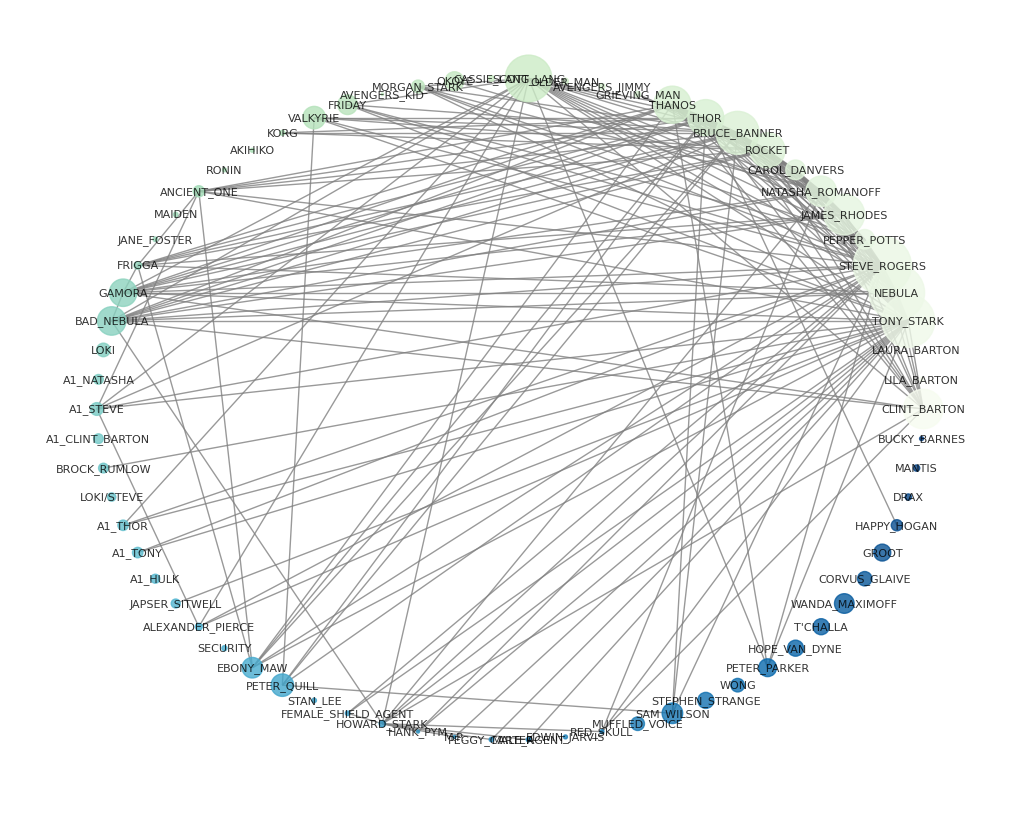

In [55]:
fig   = plt.figure(figsize = (10, 8))
nx.draw_circular(H2, node_color=range(numCharacters),font_color='black',alpha=0.8,edge_color='gray',
#                  edge_weight=5,
                 font_size=8,with_labels=True, cmap=matplotlib.cm.GnBu,
                 node_size=[2000*(v**3) for v in degree_centrality.values()])


In [56]:
cliques = list(nx.find_cliques(H3))
cl2 = list(cliques)
len(cl2)

31

(-0.885827529395411,
 1.1791962810737722,
 -0.4460439679068168,
 0.47372541577277316)

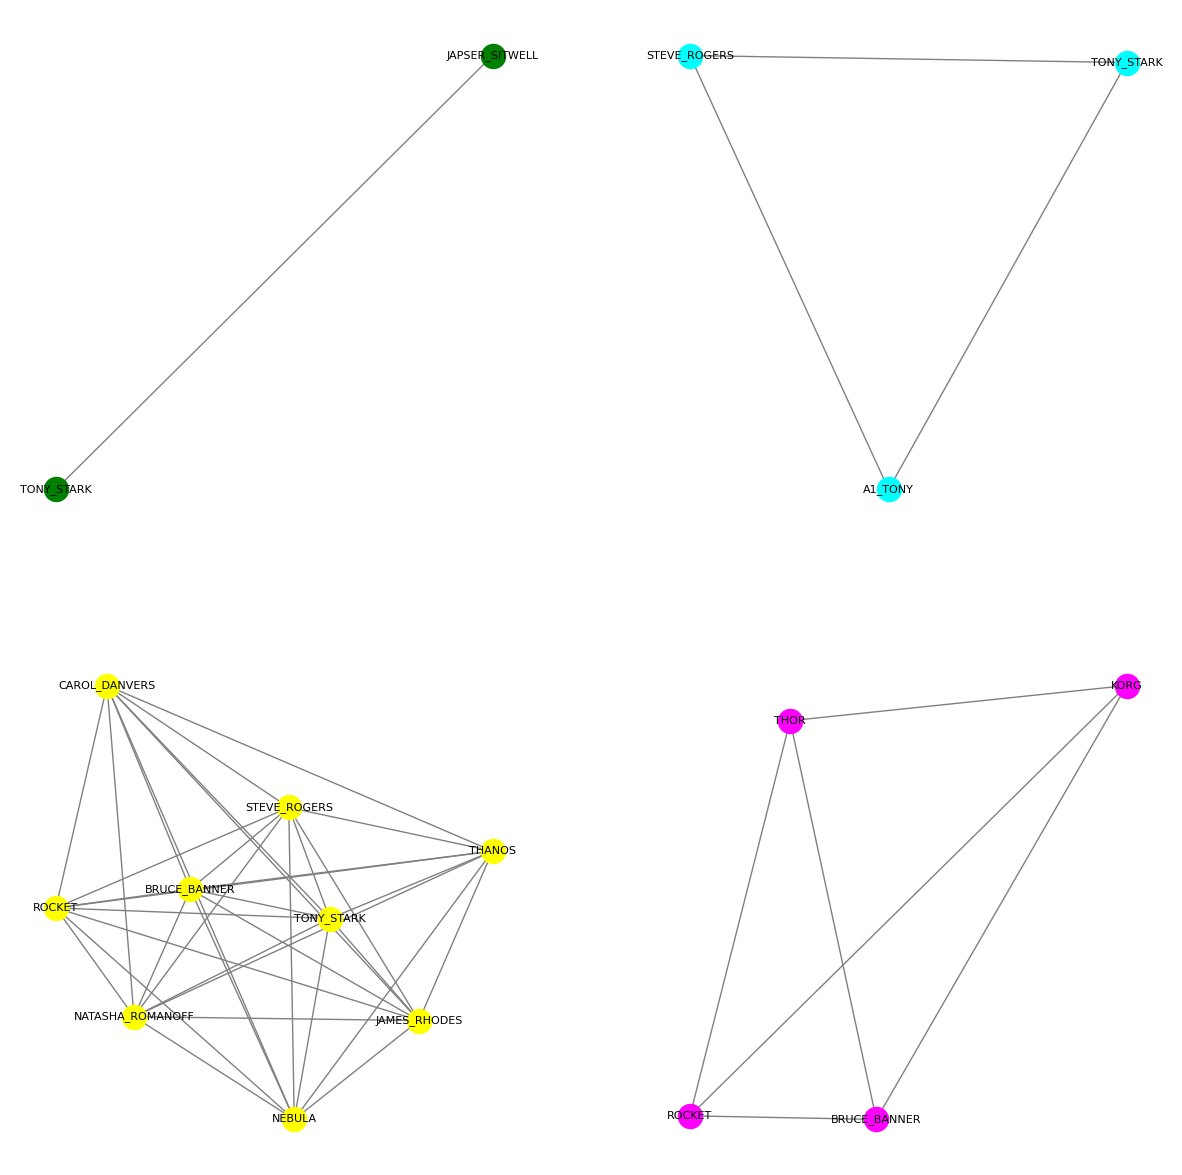

In [57]:
fig   = plt.figure(figsize = (15, 15))
ax1  = fig.add_subplot(221)
nx.draw_networkx(H2.subgraph(cl2[0]),font_size=8,font_color='black',node_color='green',edge_color='gray')
plt.axis('off')
ax2  = fig.add_subplot(222)
nx.draw_networkx(H2.subgraph(cl2[10]),font_size=8,font_color='black',node_color='cyan',edge_color='gray')
plt.axis('off')
ax3  = fig.add_subplot(223)
nx.draw_networkx(H2.subgraph(cl2[15]),font_size=8,font_color='black',node_color='yellow',edge_color='gray')
plt.axis('off')
ax4  = fig.add_subplot(224)
nx.draw_networkx(H2.subgraph(cl2[28]),font_size=8,font_color='black',node_color='#ff00ff',edge_color='gray')
plt.axis('off')

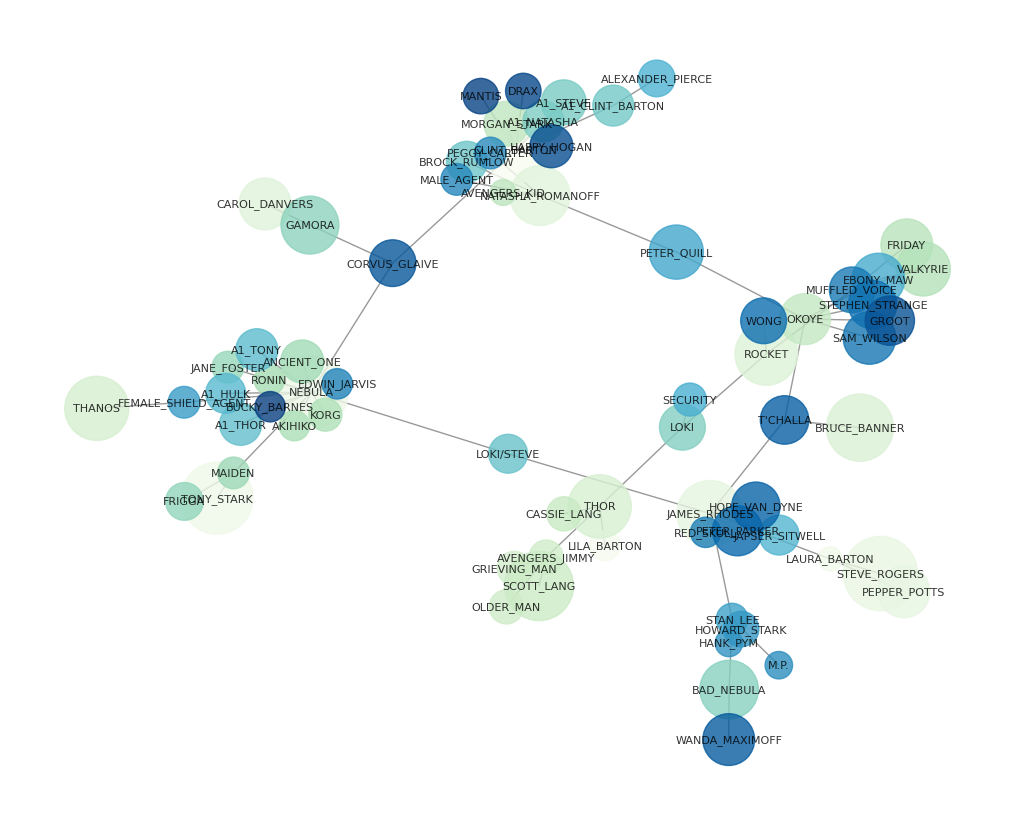

In [58]:
T = nx.minimum_spanning_tree(H1)
fig   = plt.figure(figsize = (10, 8))
nx.draw_spring(T, node_color=range(numCharacters),font_color='black',alpha=0.8,edge_color='gray',
                 font_size=8,with_labels=True, cmap=matplotlib.cm.GnBu,
                 node_size=[3000*v for v in degree_centrality.values()])


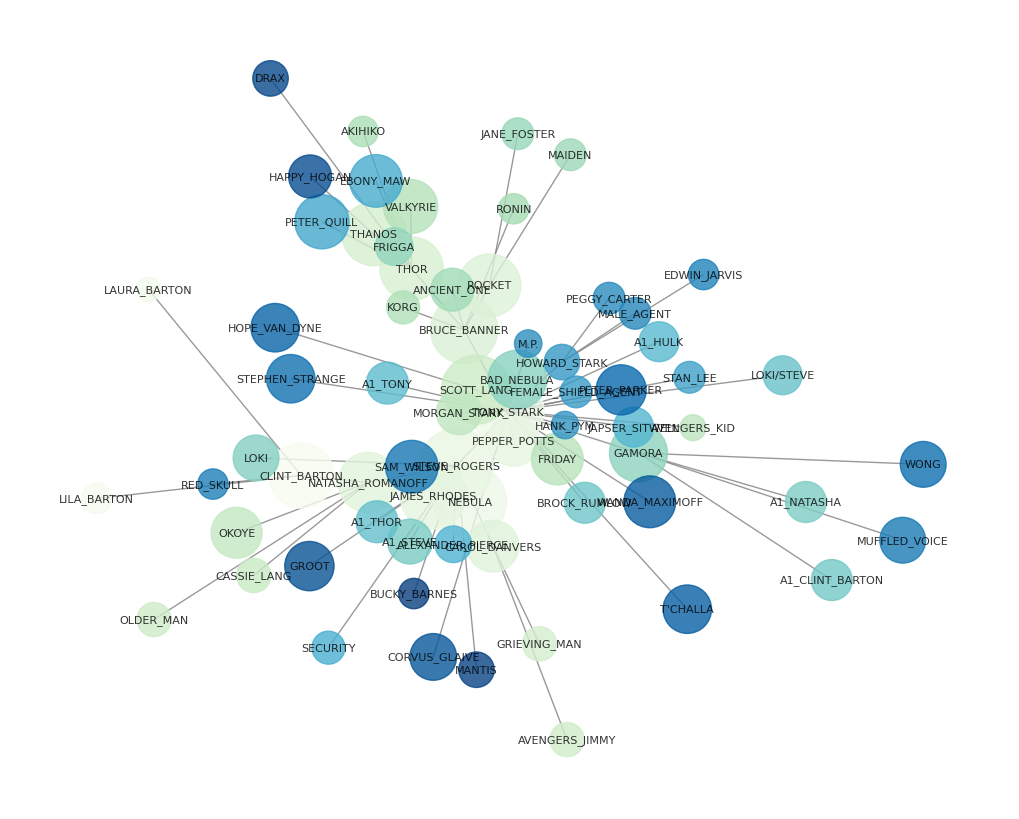

In [59]:
T = nx.maximum_spanning_tree(H1)
fig   = plt.figure(figsize = (10, 8))
nx.draw_spring(T, node_color=range(numCharacters),font_color='black',alpha=0.8,edge_color='gray',
                 font_size=8,with_labels=True, cmap=matplotlib.cm.GnBu,
                 node_size=[3000*v for v in degree_centrality.values()])

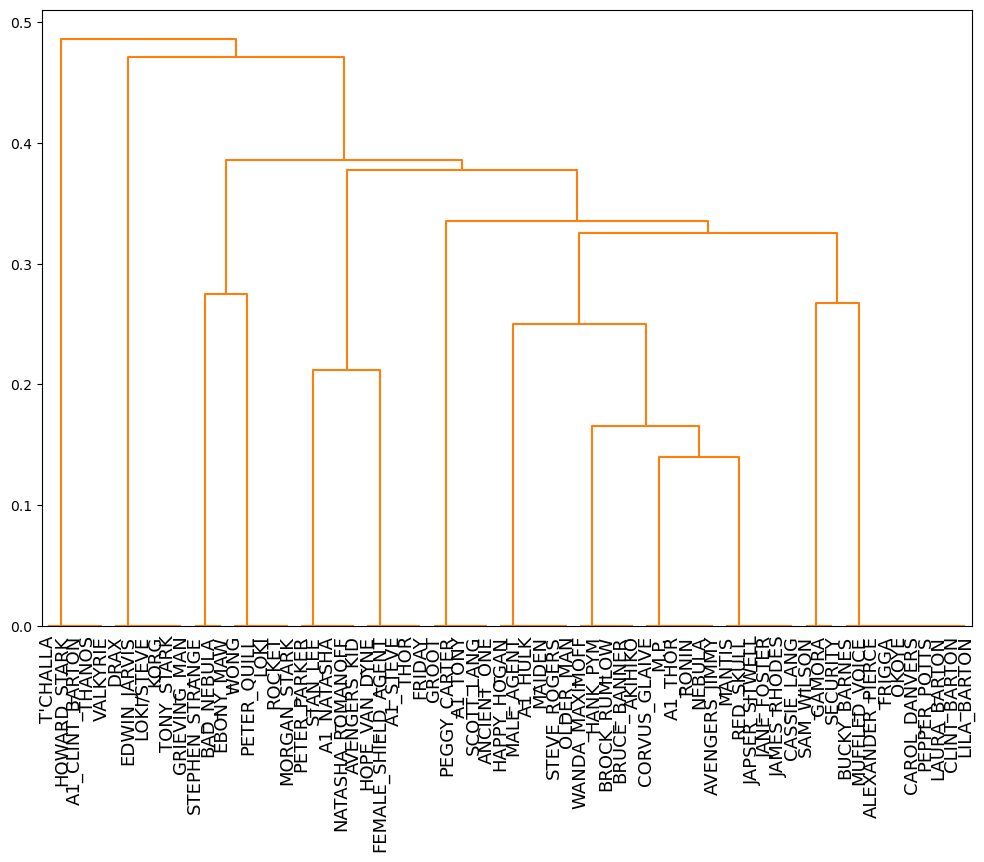

In [60]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

sd    = distance.squareform(np.log(1+interactions_characters))
h     = hierarchy.average(sd)
fig   = plt.figure(figsize = (12, 8))
ax    = fig.add_subplot(111)

h2    = hierarchy.dendrogram(h,labels=character_list,color_threshold=1.1)
ax.tick_params(axis='x', rotation=90, labelsize=13)

# Sentiment analysis

## VADER

In [61]:
vader = script.copy()
vader

lineNum     character  \
0           1  CLINT BARTON   
1           2   LILA BARTON   
2           3  CLINT BARTON   
3           4  LAURA BARTON   
4           5   LILA BARTON   
...       ...           ...   
1083     1084  STEVE ROGERS   
1084     1085    SAM WILSON   
1085     1086  STEVE ROGERS   
1086     1087    SAM WILSON   
1087     1088  STEVE ROGERS   

                                                   line  \
0     Okay, you see where you’re going? Let’s work o...   
1                                            Why three?   
2          ‘Cause two’s not enough and four’s too much-   
3               You guys want mustard or mayo, or both?   
4                           Who puts mayo on a hot dog?   
...                                                 ...   
1083                                          It isn’t.   
1084                      Thank you.  I’ll try my best.   
1085                             That’s why it’s yours.   
1086                       You gonna tell me about her?   
1087                       Nope.  I don’t think I will.   

                                             clean_line  \
0     Okay you see where youre going Lets work on ho...   
1                                             Why three   
2              Cause twos not enough and fours too much   
3                 You guys want mustard or mayo or both   
4                            Who puts mayo on a hot dog   
...                                                 ...   
1083                                            It isnt   
1084                         Thank you  Ill try my best   
1085                                Thats why its yours   
1086                        You gonna tell me about her   
1087                          Nope  I dont think I will   

                                             POS tagged  \
0     [(Okay, n), (see, v), (youre, n), (going, v), ...   
1                                       [(three, None)]   
2     [(Cause, n), (twos, v), (enough, a), (fours, v...   
3       [(guys, v), (want, a), (mustard, n), (mayo, n)]   
4            [(puts, v), (mayo, n), (hot, a), (dog, n)]   
...                                                 ...   
1083                                        [(isnt, v)]   
1084        [(Thank, n), (Ill, v), (try, v), (best, a)]   
1085                                       [(Thats, n)]   
1086                  [(gon, v), (na, None), (tell, v)]   
1087                 [(Nope, n), (dont, v), (think, v)]   

                                                  Lemma  
0       Okay see youre go Lets work get Okay goodtip...  
1                                                 three  
2                          Cause twos enough fours much  
3                                 guy want mustard mayo  
4                                      put mayo hot dog  
...                                                 ...  
1083                                               isnt  
1084                                 Thank Ill try best  
1085                                              Thats  
1086                                        gon na tell  
1087                                    Nope dont think  

[1088 rows x 6 columns]

In [62]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

vader['VaderSentiment'] = vader['Lemma'].apply(vadersentimentanalysis)
    
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

vader['Vader Analysis'] = vader['VaderSentiment'].apply(vader_analysis)
vader.head()

lineNum     character                                               line  \
0        1  CLINT BARTON  Okay, you see where you’re going? Let’s work o...   
1        2   LILA BARTON                                         Why three?   
2        3  CLINT BARTON       ‘Cause two’s not enough and four’s too much-   
3        4  LAURA BARTON            You guys want mustard or mayo, or both?   
4        5   LILA BARTON                        Who puts mayo on a hot dog?   

                                          clean_line  \
0  Okay you see where youre going Lets work on ho...   
1                                          Why three   
2           Cause twos not enough and fours too much   
3              You guys want mustard or mayo or both   
4                         Who puts mayo on a hot dog   

                                          POS tagged  \
0  [(Okay, n), (see, v), (youre, n), (going, v), ...   
1                                    [(three, None)]   
2  [(Cause, n), (twos, v), (enough, a), (fours, v...   
3    [(guys, v), (want, a), (mustard, n), (mayo, n)]   
4         [(puts, v), (mayo, n), (hot, a), (dog, n)]   

                                               Lemma  VaderSentiment  \
0    Okay see youre go Lets work get Okay goodtip...          0.4215   
1                                              three          0.0000   
2                       Cause twos enough fours much          0.0000   
3                              guy want mustard mayo          0.0772   
4                                   put mayo hot dog          0.0000   

  Vader Analysis  
0        Neutral  
1        Neutral  
2        Neutral  
3        Neutral  
4        Neutral

In [63]:
# Rolling average for smoothing 
vader['smooVader'] = vader['VaderSentiment'].rolling(5, min_periods=1).mean()
vader.head()

lineNum     character                                               line  \
0        1  CLINT BARTON  Okay, you see where you’re going? Let’s work o...   
1        2   LILA BARTON                                         Why three?   
2        3  CLINT BARTON       ‘Cause two’s not enough and four’s too much-   
3        4  LAURA BARTON            You guys want mustard or mayo, or both?   
4        5   LILA BARTON                        Who puts mayo on a hot dog?   

                                          clean_line  \
0  Okay you see where youre going Lets work on ho...   
1                                          Why three   
2           Cause twos not enough and fours too much   
3              You guys want mustard or mayo or both   
4                         Who puts mayo on a hot dog   

                                          POS tagged  \
0  [(Okay, n), (see, v), (youre, n), (going, v), ...   
1                                    [(three, None)]   
2  [(Cause, n), (twos, v), (enough, a), (fours, v...   
3    [(guys, v), (want, a), (mustard, n), (mayo, n)]   
4         [(puts, v), (mayo, n), (hot, a), (dog, n)]   

                                               Lemma  VaderSentiment  \
0    Okay see youre go Lets work get Okay goodtip...          0.4215   
1                                              three          0.0000   
2                       Cause twos enough fours much          0.0000   
3                              guy want mustard mayo          0.0772   
4                                   put mayo hot dog          0.0000   

  Vader Analysis  smooVader  
0        Neutral   0.421500  
1        Neutral   0.210750  
2        Neutral   0.140500  
3        Neutral   0.124675  
4        Neutral   0.099740

In [64]:
# Noise removal
# https://machinelearning1.wordpress.com/2014/07/13/signal-processing-apply-median-filters-python/
import scipy.signal as sp
def apply_filter(df):
    print('Before applying noise-filter \n', df.describe())    
#     n = 20 # larger n, smoother curve
#     b = [1.0/n]*n
#     a = 1
    df['noise_removed'] = sp.medfilt(df['smooVader'], 15)    
    print('After applying noise-filter \n', df.describe())
    return df
vader = apply_filter(vader)

Before applying noise-filter 
            lineNum  VaderSentiment    smooVader
count  1088.000000     1088.000000  1088.000000
mean    544.500000        0.046922     0.047313
std     314.222851        0.320080     0.152555
min       1.000000       -0.923100    -0.440300
25%     272.750000        0.000000    -0.052080
50%     544.500000        0.000000     0.051960
75%     816.250000        0.222025     0.142870
max    1088.000000        0.971500     0.586680
After applying noise-filter 
            lineNum  VaderSentiment    smooVader  noise_removed
count  1088.000000     1088.000000  1088.000000    1088.000000
mean    544.500000        0.046922     0.047313       0.049770
std     314.222851        0.320080     0.152555       0.088155
min       1.000000       -0.923100    -0.440300      -0.186420
25%     272.750000        0.000000    -0.052080       0.000000
50%     544.500000        0.000000     0.051960       0.056450
75%     816.250000        0.222025     0.142870       0.100390
max

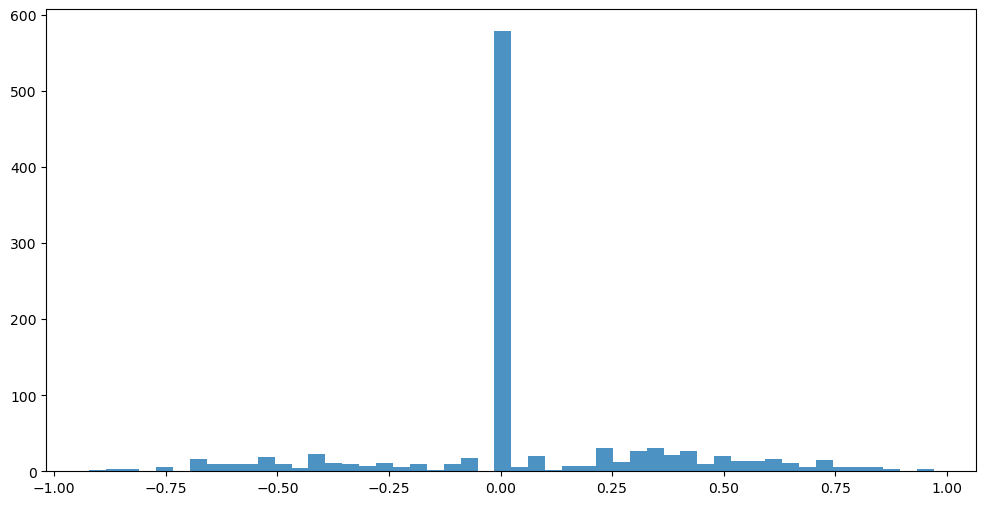

In [65]:
# Plot histogram
import matplotlib as mpl
mpl.style.use('default')
plt.figure(figsize=(12, 6))
plt.hist(vader['VaderSentiment'], bins=50, alpha=0.8)
plt.show()

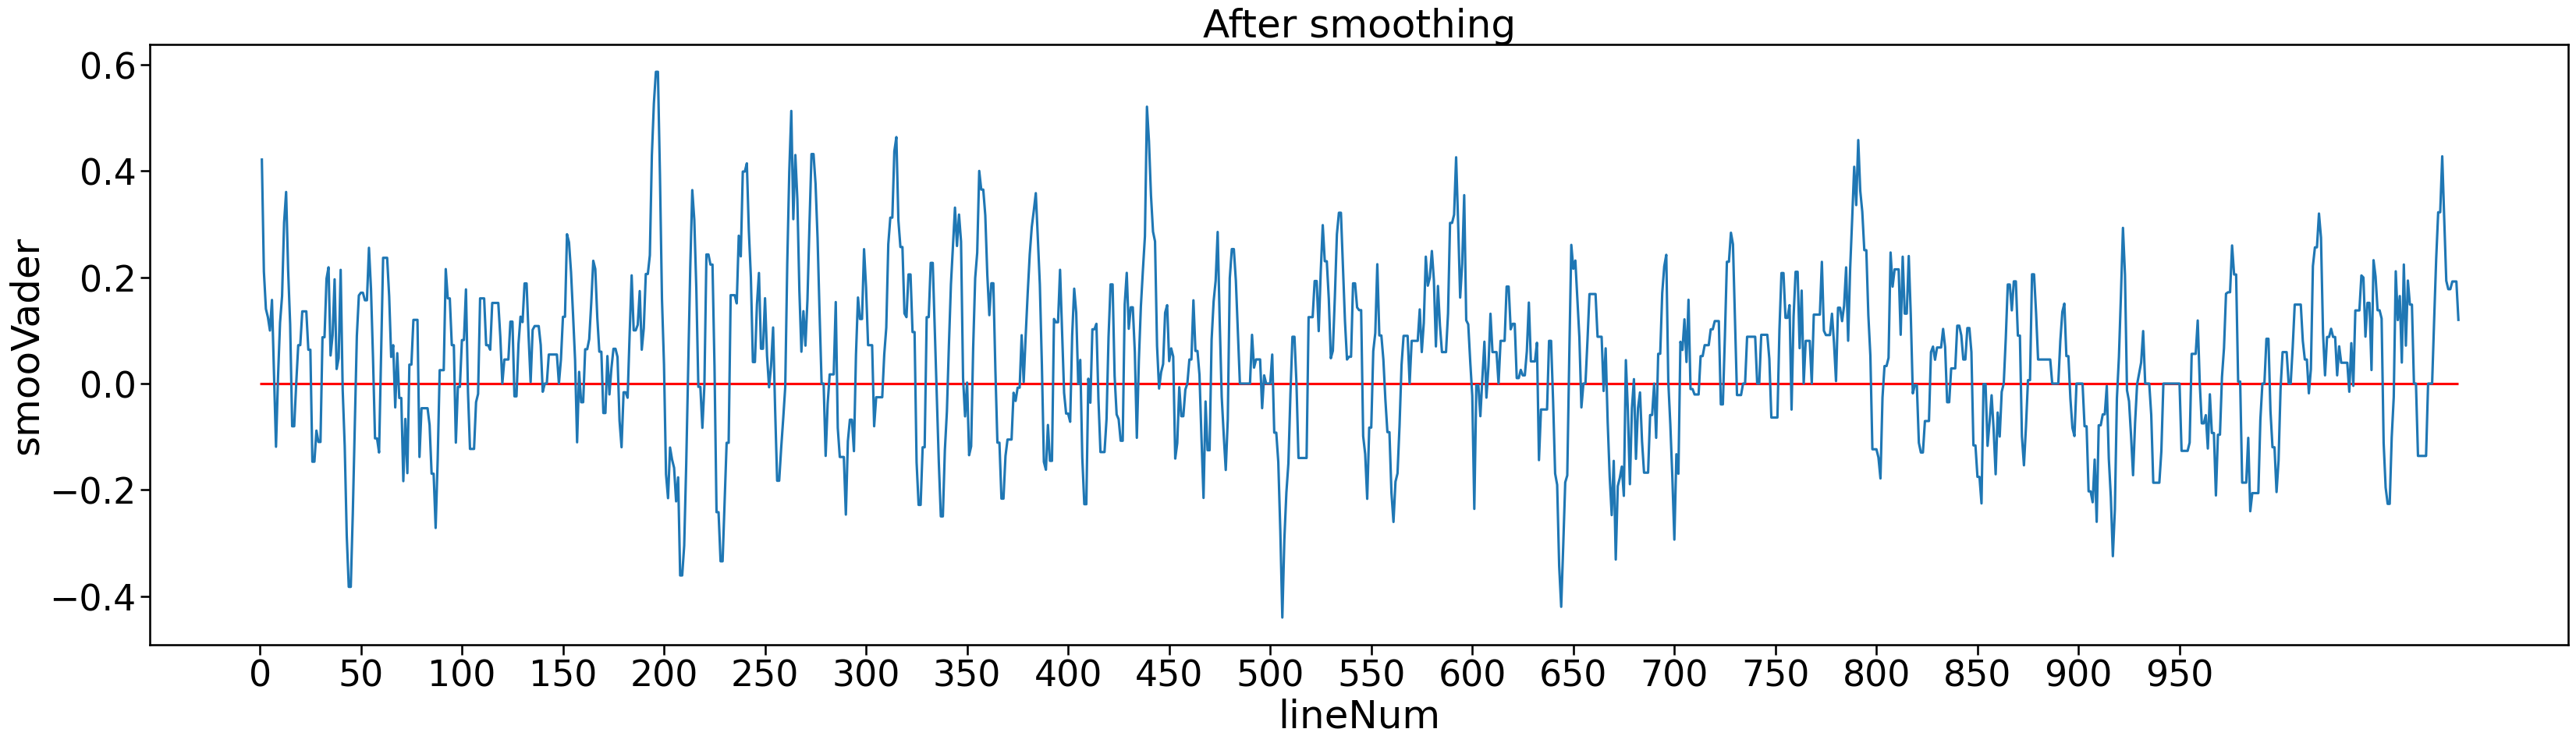

In [66]:
# plt.plot(fin_df['lineNum'], fin_df['VadarSentiment'])

import seaborn as sns

plt.figure(figsize=(40, 10))
sns.set_context("talk", font_scale=2)
sns.lineplot(x='lineNum', y='smooVader', data=vader)
plt.title('After smoothing')
plt.xticks(np.arange(0, 1000, 50))
plt.hlines(0, 0, vader.lineNum.max(), color='red')
plt.show()

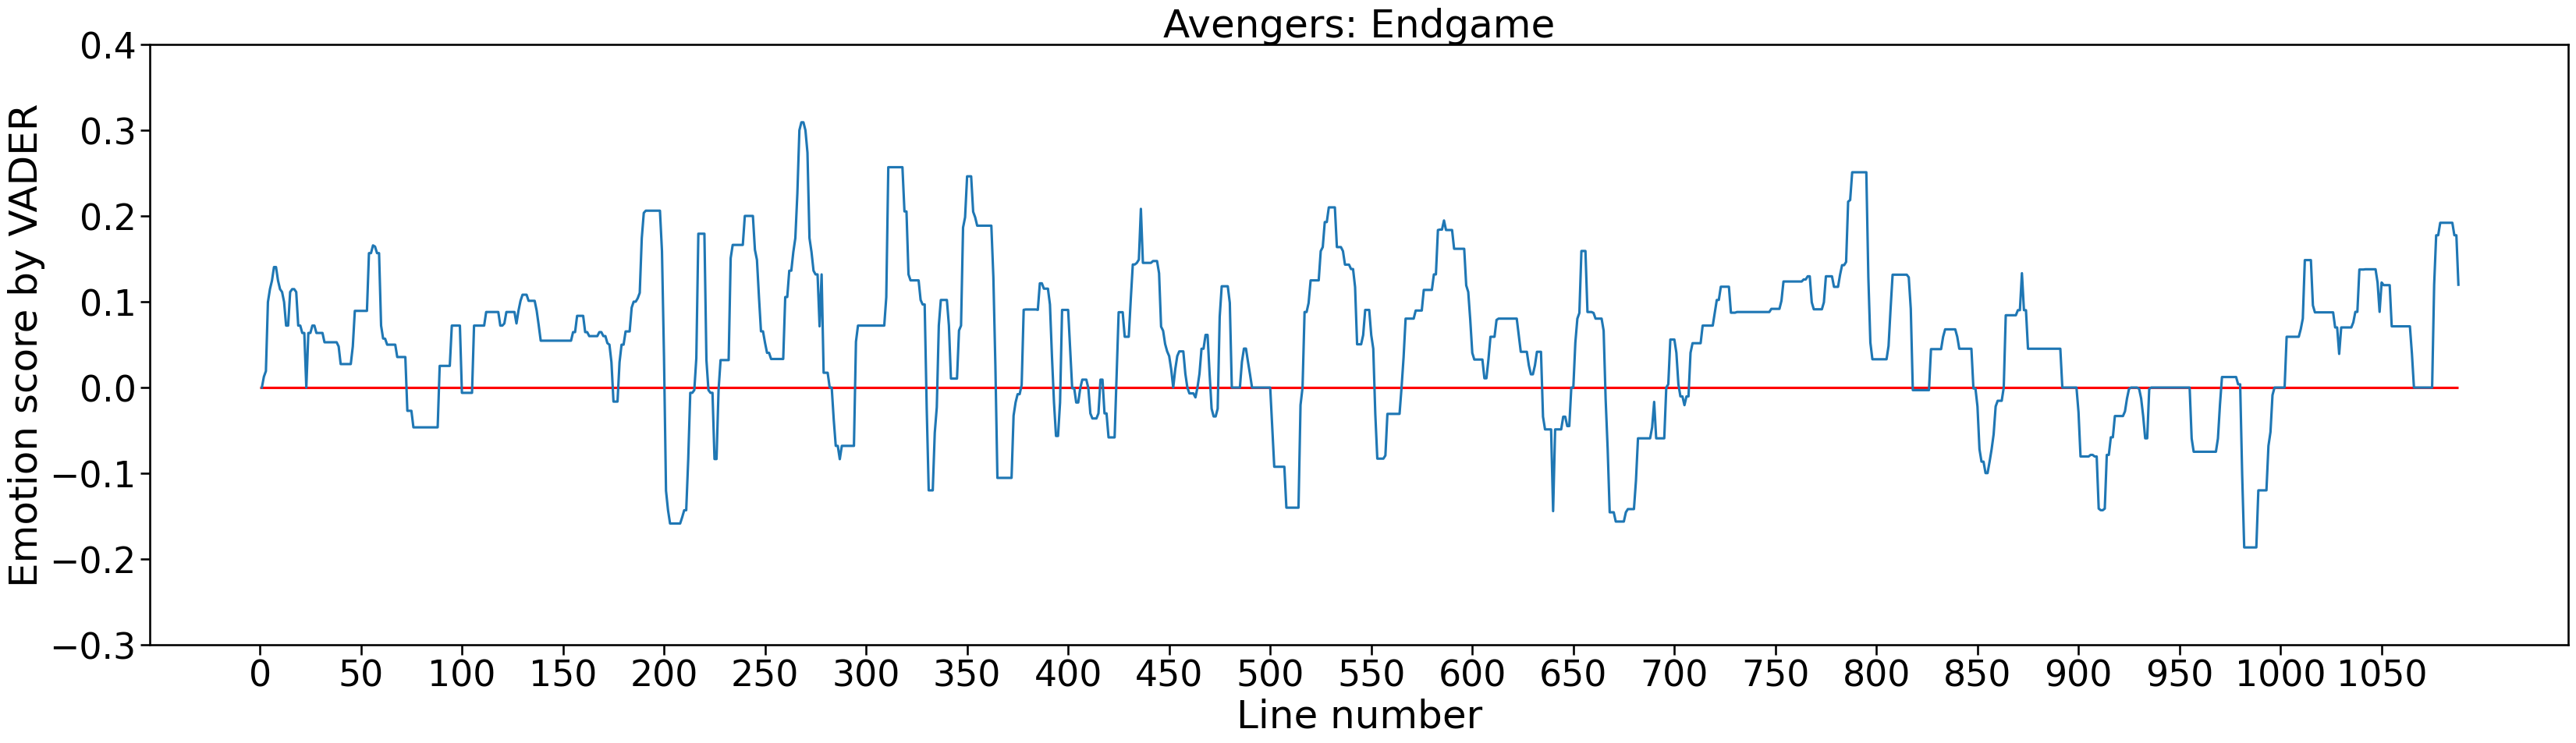

In [67]:
plt.figure(figsize=(40, 10))
sns.set_context("talk", font_scale=2)
sns.lineplot(x='lineNum', y='noise_removed', data=vader)
plt.title('Avengers: Endgame')
plt.xlabel('Line number')
plt.ylabel('Emotion score by VADER')
plt.ylim([-0.3, 0.4])
plt.xticks(np.arange(0, vader.lineNum.max(), 50))
plt.hlines(0, 0, vader.lineNum.max(), color='red')
plt.show()

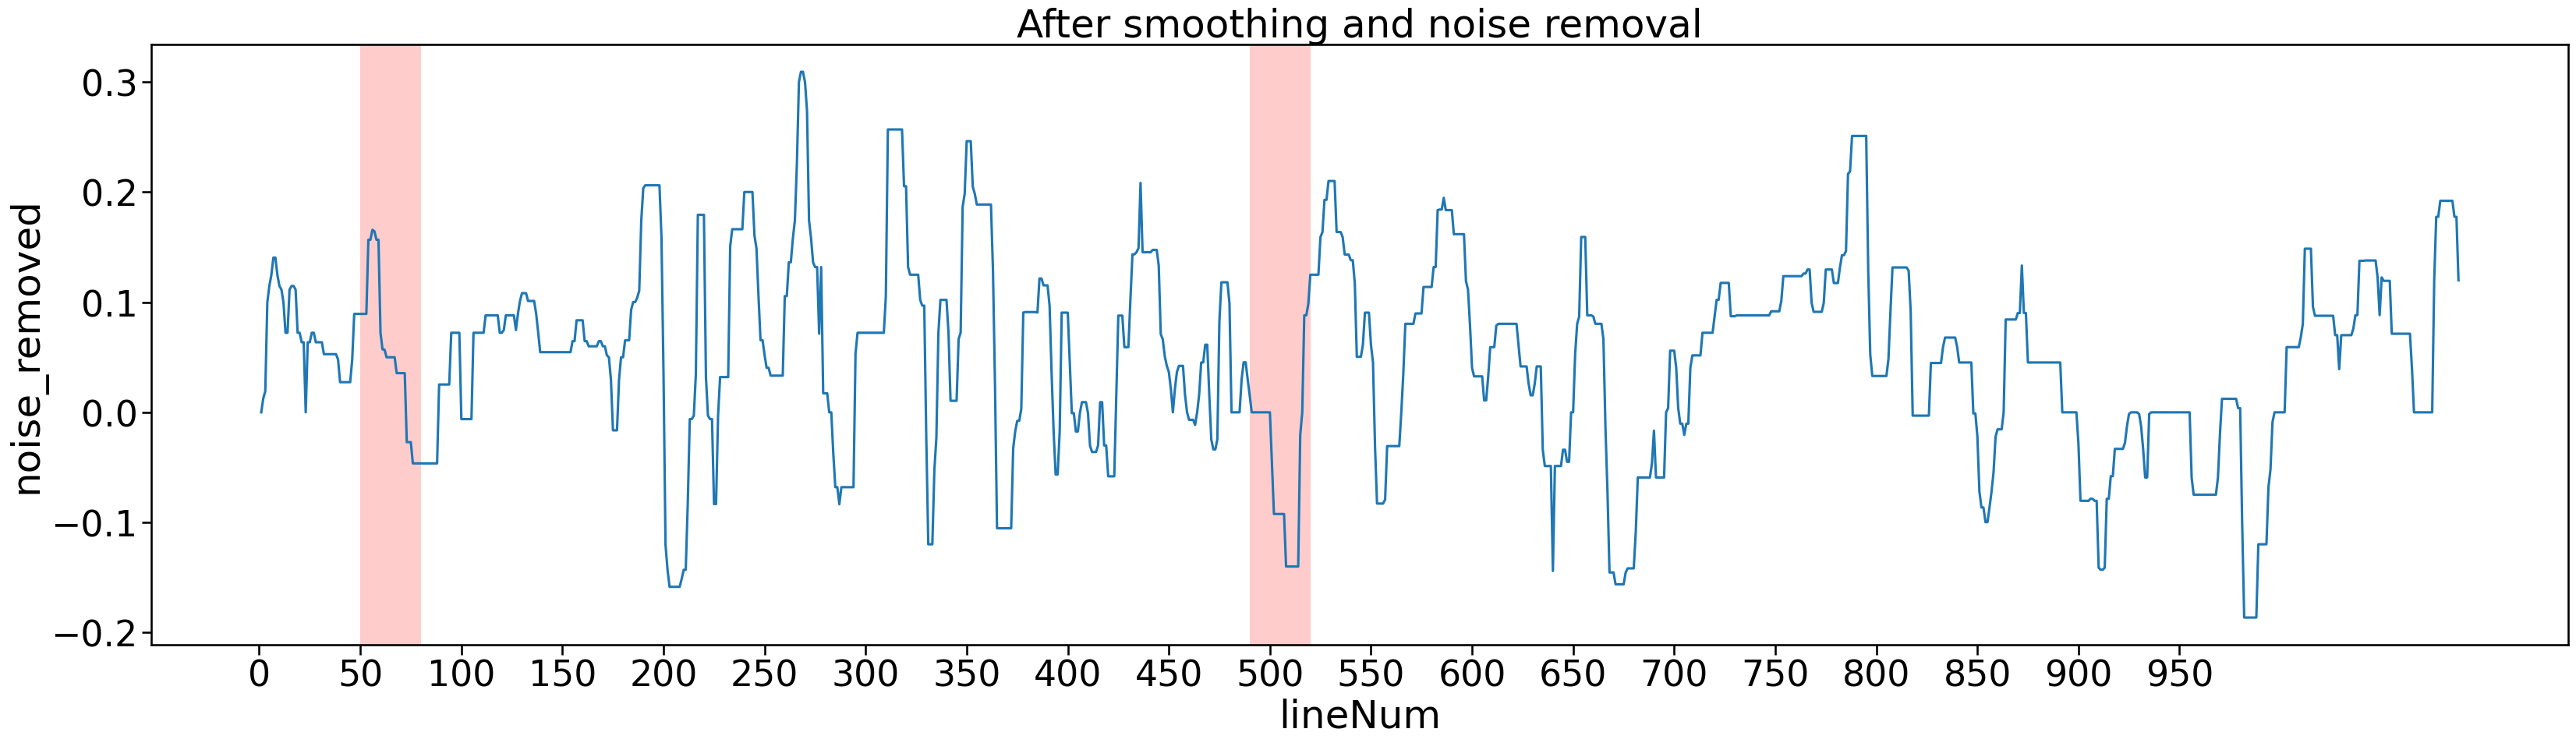

In [68]:
# Plot 
plt.figure(figsize=(40, 10))
sns.set_context("talk", font_scale=2)
plot = sns.lineplot(x='lineNum', y='noise_removed', data=vader)
plt.title('After smoothing and noise removal')
plt.xticks(np.arange(0, 1000, 50))

plot.axvspan(490, 520, facecolor='red', alpha=.2)
plot.axvspan(50, 80, facecolor='red', alpha=.2)
plt.show()

## Test Blob

In [69]:
blob = script.copy()
blob

lineNum     character  \
0           1  CLINT BARTON   
1           2   LILA BARTON   
2           3  CLINT BARTON   
3           4  LAURA BARTON   
4           5   LILA BARTON   
...       ...           ...   
1083     1084  STEVE ROGERS   
1084     1085    SAM WILSON   
1085     1086  STEVE ROGERS   
1086     1087    SAM WILSON   
1087     1088  STEVE ROGERS   

                                                   line  \
0     Okay, you see where you’re going? Let’s work o...   
1                                            Why three?   
2          ‘Cause two’s not enough and four’s too much-   
3               You guys want mustard or mayo, or both?   
4                           Who puts mayo on a hot dog?   
...                                                 ...   
1083                                          It isn’t.   
1084                      Thank you.  I’ll try my best.   
1085                             That’s why it’s yours.   
1086                       You gonna tell me about her?   
1087                       Nope.  I don’t think I will.   

                                             clean_line  \
0     Okay you see where youre going Lets work on ho...   
1                                             Why three   
2              Cause twos not enough and fours too much   
3                 You guys want mustard or mayo or both   
4                            Who puts mayo on a hot dog   
...                                                 ...   
1083                                            It isnt   
1084                         Thank you  Ill try my best   
1085                                Thats why its yours   
1086                        You gonna tell me about her   
1087                          Nope  I dont think I will   

                                             POS tagged  \
0     [(Okay, n), (see, v), (youre, n), (going, v), ...   
1                                       [(three, None)]   
2     [(Cause, n), (twos, v), (enough, a), (fours, v...   
3       [(guys, v), (want, a), (mustard, n), (mayo, n)]   
4            [(puts, v), (mayo, n), (hot, a), (dog, n)]   
...                                                 ...   
1083                                        [(isnt, v)]   
1084        [(Thank, n), (Ill, v), (try, v), (best, a)]   
1085                                       [(Thats, n)]   
1086                  [(gon, v), (na, None), (tell, v)]   
1087                 [(Nope, n), (dont, v), (think, v)]   

                                                  Lemma  
0       Okay see youre go Lets work get Okay goodtip...  
1                                                 three  
2                          Cause twos enough fours much  
3                                 guy want mustard mayo  
4                                      put mayo hot dog  
...                                                 ...  
1083                                               isnt  
1084                                 Thank Ill try best  
1085                                              Thats  
1086                                        gon na tell  
1087                                    Nope dont think  

[1088 rows x 6 columns]

In [70]:
# TestBlob
from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

blob['Subjectivity'] = blob['Lemma'].apply(getSubjectivity) 
blob['Polarity'] = blob['Lemma'].apply(getPolarity) 
blob['Analysis'] = blob['Polarity'].apply(analysis)
blob.head()

lineNum     character                                               line  \
0        1  CLINT BARTON  Okay, you see where you’re going? Let’s work o...   
1        2   LILA BARTON                                         Why three?   
2        3  CLINT BARTON       ‘Cause two’s not enough and four’s too much-   
3        4  LAURA BARTON            You guys want mustard or mayo, or both?   
4        5   LILA BARTON                        Who puts mayo on a hot dog?   

                                          clean_line  \
0  Okay you see where youre going Lets work on ho...   
1                                          Why three   
2           Cause twos not enough and fours too much   
3              You guys want mustard or mayo or both   
4                         Who puts mayo on a hot dog   

                                          POS tagged  \
0  [(Okay, n), (see, v), (youre, n), (going, v), ...   
1                                    [(three, None)]   
2  [(Cause, n), (twos, v), (enough, a), (fours, v...   
3    [(guys, v), (want, a), (mustard, n), (mayo, n)]   
4         [(puts, v), (mayo, n), (hot, a), (dog, n)]   

                                               Lemma  Subjectivity  Polarity  \
0    Okay see youre go Lets work get Okay goodtip...          0.50      0.50   
1                                              three          0.00      0.00   
2                       Cause twos enough fours much          0.35      0.10   
3                              guy want mustard mayo          0.00      0.00   
4                                   put mayo hot dog          0.85      0.25   

   Analysis  
0  Positive  
1   Neutral  
2  Positive  
3   Neutral  
4  Positive

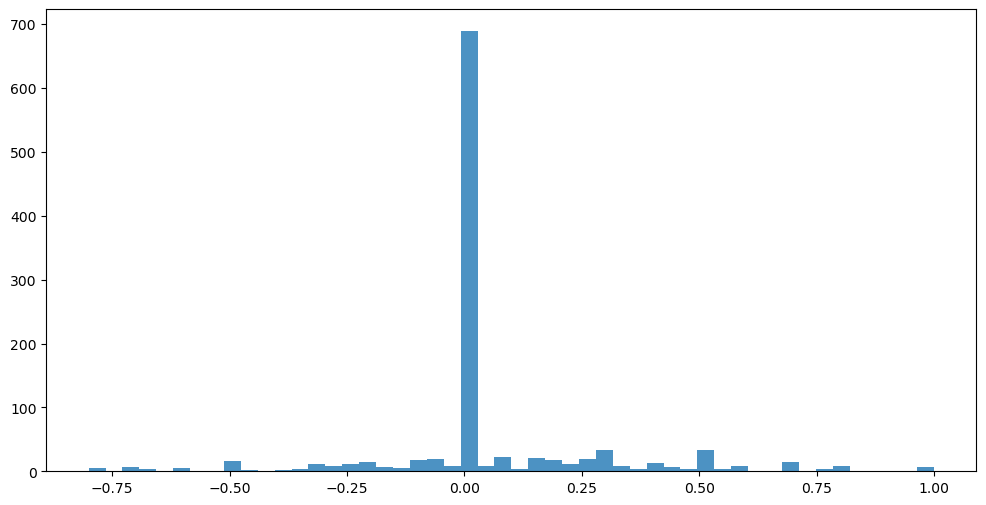

In [71]:
# Plot histogram
plt.style.use('default')
plt.figure(figsize=(12, 6))
plt.hist(blob['Polarity'], bins=50, alpha=0.8)
plt.show()

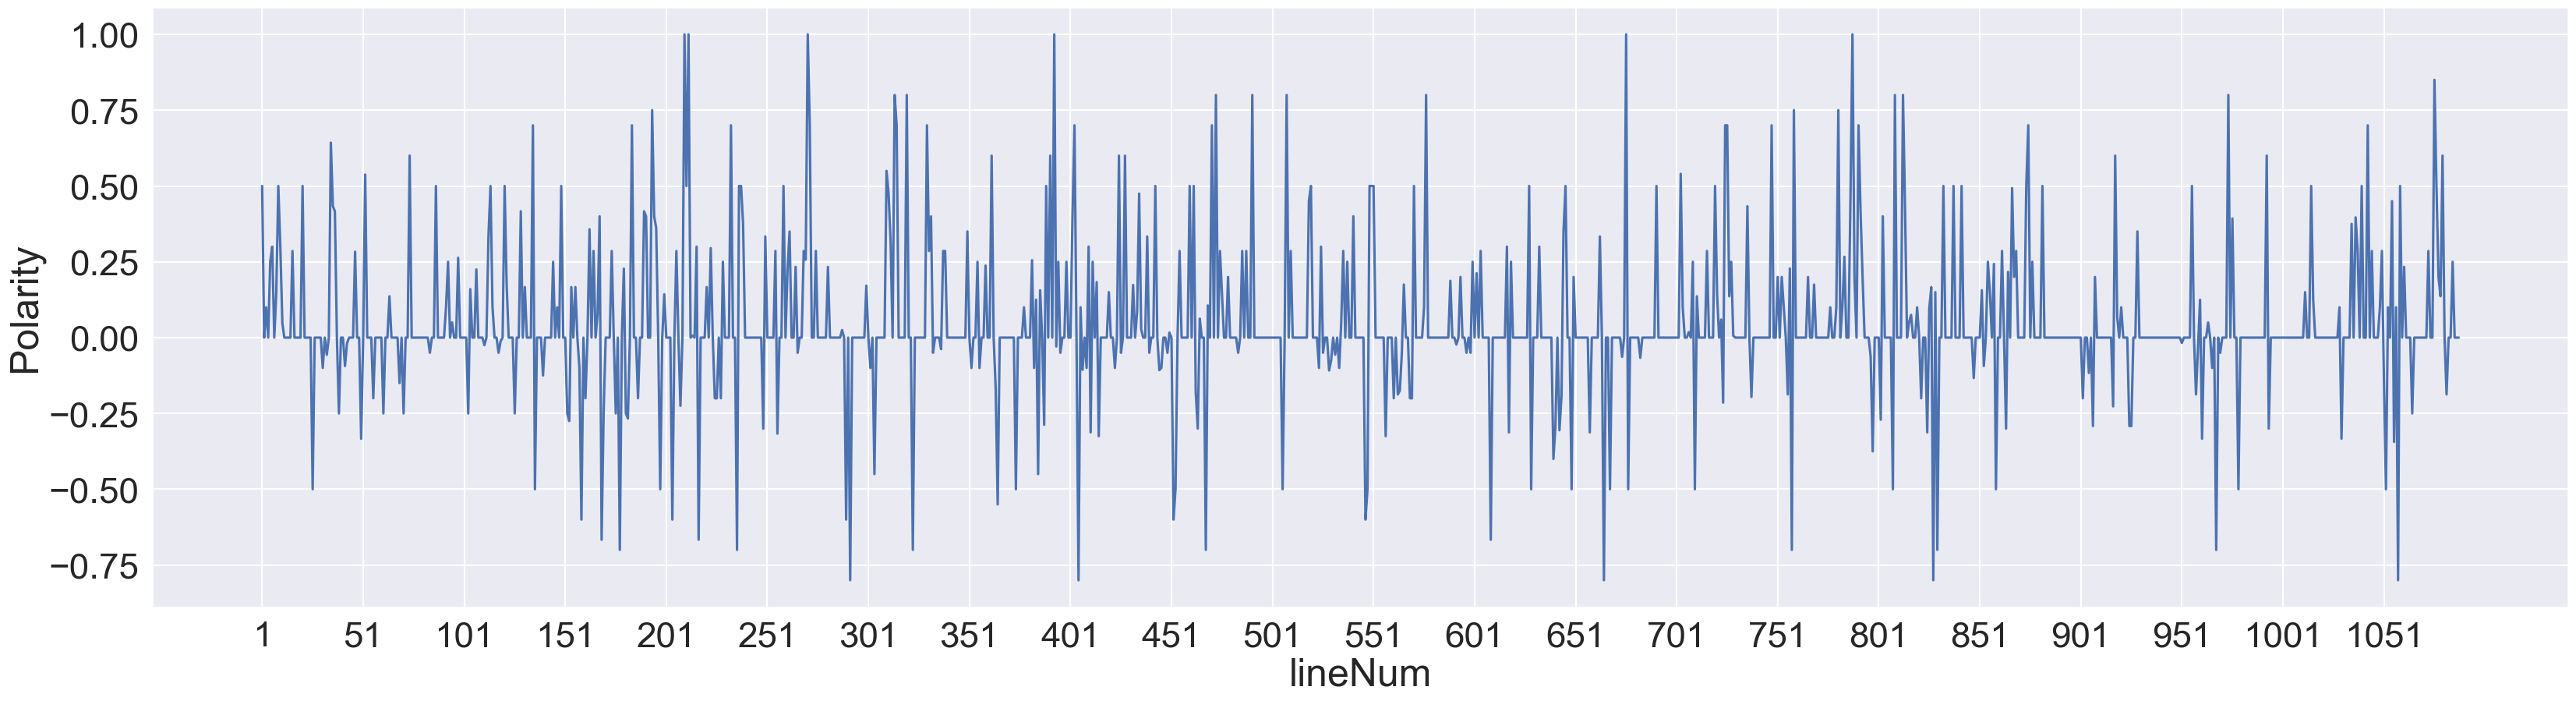

In [72]:
plt.figure(figsize=(40, 10))
sns.set()
sns.set_context("talk", font_scale=2)
sns.lineplot(x='lineNum', y='Polarity', data=blob)
plt.xticks(np.arange(blob.lineNum.min(), blob.lineNum.max(), 50))
plt.show()

In [73]:
# Rolling average for smoothing
blob['smooPolarity'] = blob['Polarity'].rolling(5, min_periods=1).mean()
blob['smooSubjectivity'] = blob['Subjectivity'].rolling(5, min_periods=1).mean()
blob.head()

lineNum     character                                               line  \
0        1  CLINT BARTON  Okay, you see where you’re going? Let’s work o...   
1        2   LILA BARTON                                         Why three?   
2        3  CLINT BARTON       ‘Cause two’s not enough and four’s too much-   
3        4  LAURA BARTON            You guys want mustard or mayo, or both?   
4        5   LILA BARTON                        Who puts mayo on a hot dog?   

                                          clean_line  \
0  Okay you see where youre going Lets work on ho...   
1                                          Why three   
2           Cause twos not enough and fours too much   
3              You guys want mustard or mayo or both   
4                         Who puts mayo on a hot dog   

                                          POS tagged  \
0  [(Okay, n), (see, v), (youre, n), (going, v), ...   
1                                    [(three, None)]   
2  [(Cause, n), (twos, v), (enough, a), (fours, v...   
3    [(guys, v), (want, a), (mustard, n), (mayo, n)]   
4         [(puts, v), (mayo, n), (hot, a), (dog, n)]   

                                               Lemma  Subjectivity  Polarity  \
0    Okay see youre go Lets work get Okay goodtip...          0.50      0.50   
1                                              three          0.00      0.00   
2                       Cause twos enough fours much          0.35      0.10   
3                              guy want mustard mayo          0.00      0.00   
4                                   put mayo hot dog          0.85      0.25   

   Analysis  smooPolarity  smooSubjectivity  
0  Positive          0.50          0.500000  
1   Neutral          0.25          0.250000  
2  Positive          0.20          0.283333  
3   Neutral          0.15          0.212500  
4  Positive          0.17          0.340000

In [74]:
# Noise removal
# https://machinelearning1.wordpress.com/2014/07/13/signal-processing-apply-median-filters-python/
import scipy.signal as sp
def apply_filter(df):
    print('Before applying noise-filter \n', df.describe())    
#     n = 20 # larger n, smoother curve
#     b = [1.0/n]*n
#     a = 1
    df['noise_removed'] = sp.medfilt(df['smooPolarity'], 15)    
    print('After applying noise-filter \n', df.describe())
    return df
blob = apply_filter(blob)

Before applying noise-filter 
            lineNum  Subjectivity     Polarity  smooPolarity  smooSubjectivity
count  1088.000000   1088.000000  1088.000000   1088.000000       1088.000000
mean    544.500000      0.220031     0.044686      0.045247          0.220561
std     314.222851      0.309750     0.238784      0.114643          0.146447
min       1.000000      0.000000    -0.800000     -0.280000          0.000000
25%     272.750000      0.000000     0.000000     -0.012542          0.107143
50%     544.500000      0.000000     0.000000      0.030000          0.213167
75%     816.250000      0.500000     0.000000      0.100000          0.323810
max    1088.000000      1.000000     1.000000      0.501250          0.712778
After applying noise-filter 
            lineNum  Subjectivity     Polarity  smooPolarity  smooSubjectivity  \
count  1088.000000   1088.000000  1088.000000   1088.000000       1088.000000   
mean    544.500000      0.220031     0.044686      0.045247          0.2205

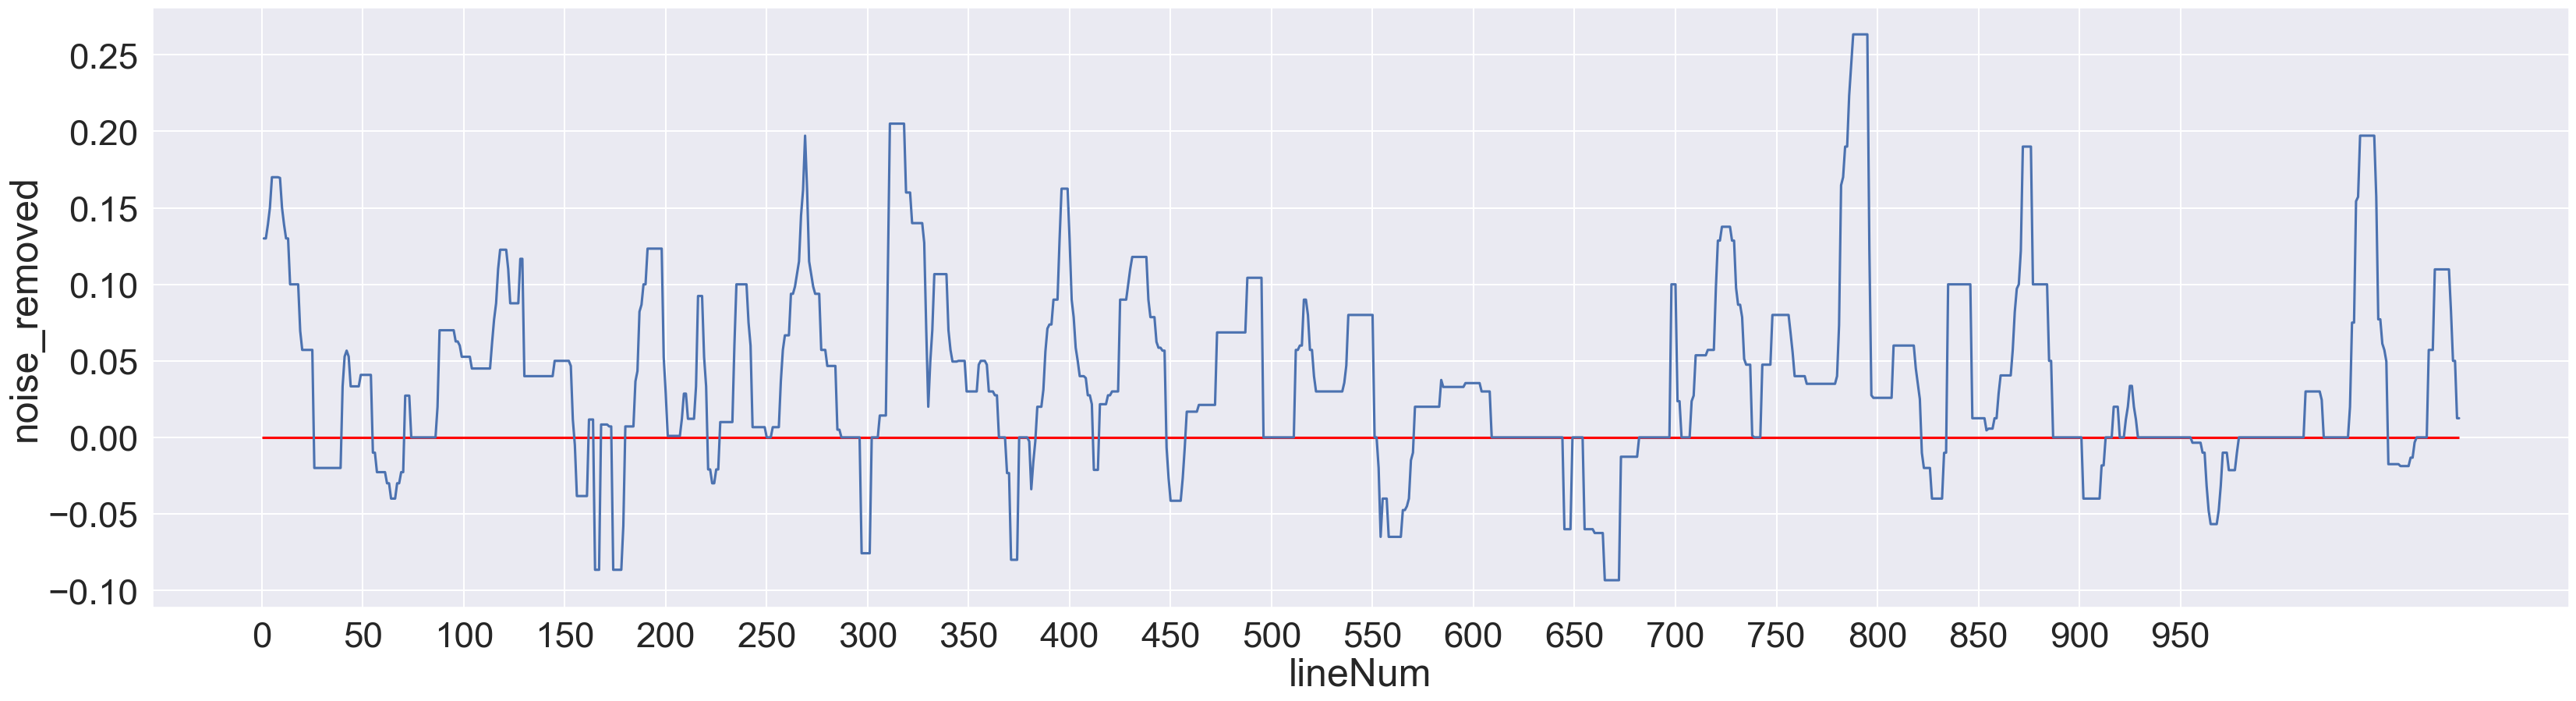

In [75]:
plt.figure(figsize=(40, 10))
sns.set_context("talk", font_scale=2)
sns.lineplot(x='lineNum', y='noise_removed', data=blob)
plt.hlines(0, 0, blob.lineNum.max(), color='red')
plt.xticks(np.arange(0, 1000, 50))
plt.show()

# NRCLex


## Line by line

In [76]:
from nrclex import NRCLex

In [77]:
nrc = script.copy()
nrc.head()

lineNum     character                                               line  \
0        1  CLINT BARTON  Okay, you see where you’re going? Let’s work o...   
1        2   LILA BARTON                                         Why three?   
2        3  CLINT BARTON       ‘Cause two’s not enough and four’s too much-   
3        4  LAURA BARTON            You guys want mustard or mayo, or both?   
4        5   LILA BARTON                        Who puts mayo on a hot dog?   

                                          clean_line  \
0  Okay you see where youre going Lets work on ho...   
1                                          Why three   
2           Cause twos not enough and fours too much   
3              You guys want mustard or mayo or both   
4                         Who puts mayo on a hot dog   

                                          POS tagged  \
0  [(Okay, n), (see, v), (youre, n), (going, v), ...   
1                                    [(three, None)]   
2  [(Cause, n), (twos, v), (enough, a), (fours, v...   
3    [(guys, v), (want, a), (mustard, n), (mayo, n)]   
4         [(puts, v), (mayo, n), (hot, a), (dog, n)]   

                                               Lemma  
0    Okay see youre go Lets work get Okay goodtip...  
1                                              three  
2                       Cause twos enough fours much  
3                              guy want mustard mayo  
4                                   put mayo hot dog

In [78]:
# Change the line to text_object for NRCLex
def totextobject(line):
    text_object = NRCLex(line)
    return text_object
nrc['text_object'] = nrc['Lemma'].apply(totextobject)
nrc.head(5)

lineNum     character                                               line  \
0        1  CLINT BARTON  Okay, you see where you’re going? Let’s work o...   
1        2   LILA BARTON                                         Why three?   
2        3  CLINT BARTON       ‘Cause two’s not enough and four’s too much-   
3        4  LAURA BARTON            You guys want mustard or mayo, or both?   
4        5   LILA BARTON                        Who puts mayo on a hot dog?   

                                          clean_line  \
0  Okay you see where youre going Lets work on ho...   
1                                          Why three   
2           Cause twos not enough and fours too much   
3              You guys want mustard or mayo or both   
4                         Who puts mayo on a hot dog   

                                          POS tagged  \
0  [(Okay, n), (see, v), (youre, n), (going, v), ...   
1                                    [(three, None)]   
2  [(Cause, n), (twos, v), (enough, a), (fours, v...   
3    [(guys, v), (want, a), (mustard, n), (mayo, n)]   
4         [(puts, v), (mayo, n), (hot, a), (dog, n)]   

                                               Lemma  \
0    Okay see youre go Lets work get Okay goodtip...   
1                                              three   
2                       Cause twos enough fours much   
3                              guy want mustard mayo   
4                                   put mayo hot dog   

                                text_object  
0  <nrclex.NRCLex object at 0x7fbf84323c10>  
1  <nrclex.NRCLex object at 0x7fbf84323d00>  
2  <nrclex.NRCLex object at 0x7fbf84323850>  
3  <nrclex.NRCLex object at 0x7fbf84323b20>  
4  <nrclex.NRCLex object at 0x7fbf84323cd0>

In [79]:
# NRCLex analysis for each line
for i, row in nrc.iterrows():
    freq = nrc.loc[i, 'text_object'].affect_frequencies
    for key in freq.keys():
        nrc.at[i, key] = freq[key]
        
nrc.head()

lineNum     character                                               line  \
0        1  CLINT BARTON  Okay, you see where you’re going? Let’s work o...   
1        2   LILA BARTON                                         Why three?   
2        3  CLINT BARTON       ‘Cause two’s not enough and four’s too much-   
3        4  LAURA BARTON            You guys want mustard or mayo, or both?   
4        5   LILA BARTON                        Who puts mayo on a hot dog?   

                                          clean_line  \
0  Okay you see where youre going Lets work on ho...   
1                                          Why three   
2           Cause twos not enough and fours too much   
3              You guys want mustard or mayo or both   
4                         Who puts mayo on a hot dog   

                                          POS tagged  \
0  [(Okay, n), (see, v), (youre, n), (going, v), ...   
1                                    [(three, None)]   
2  [(Cause, n), (twos, v), (enough, a), (fours, v...   
3    [(guys, v), (want, a), (mustard, n), (mayo, n)]   
4         [(puts, v), (mayo, n), (hot, a), (dog, n)]   

                                               Lemma  \
0    Okay see youre go Lets work get Okay goodtip...   
1                                              three   
2                       Cause twos enough fours much   
3                              guy want mustard mayo   
4                                   put mayo hot dog   

                                text_object  fear  anger  anticip  trust  \
0  <nrclex.NRCLex object at 0x7fbf84323c10>   0.0    0.0      0.0    0.0   
1  <nrclex.NRCLex object at 0x7fbf84323d00>   0.0    0.0      0.0    0.0   
2  <nrclex.NRCLex object at 0x7fbf84323850>   0.0    0.0      0.0    0.0   
3  <nrclex.NRCLex object at 0x7fbf84323b20>   0.0    0.0      0.0    0.0   
4  <nrclex.NRCLex object at 0x7fbf84323cd0>   0.0    1.0      0.0    0.0   

   surprise  positive  negative  sadness  disgust  joy  anticipation  
0       0.0       0.0       0.0      0.0      0.0  0.0           NaN  
1       0.0       0.0       0.0      0.0      0.0  0.0           NaN  
2       0.0       0.0       0.0      0.0      0.0  0.0           NaN  
3       0.0       0.0       0.0      0.0      0.0  0.0           NaN  
4       0.0       0.0       0.0      0.0      0.0  0.0           NaN

In [80]:
nrc = nrc.drop('anticip', axis=1)

In [81]:
def smoothing(column):
    smoothed = column.rolling(5, min_periods=1).mean()
    return smoothed

nrc['smooFear'] = smoothing(nrc['fear'])
nrc['smooAnger'] = smoothing(nrc['anger'])
nrc['smooTrust'] = smoothing(nrc['trust'])
nrc['smooSurprise'] = smoothing(nrc['surprise'])
nrc['smooPositive'] = smoothing(nrc['positive'])
nrc['smooNegative'] = smoothing(nrc['negative'])
nrc['smooSadness'] = smoothing(nrc['sadness'])
nrc['smooDisgust'] = smoothing(nrc['disgust'])
nrc['smooJoy'] = smoothing(nrc['joy'])
nrc['smooAnticipation'] = smoothing(nrc['anticipation'])

nrc.head()

lineNum     character                                               line  \
0        1  CLINT BARTON  Okay, you see where you’re going? Let’s work o...   
1        2   LILA BARTON                                         Why three?   
2        3  CLINT BARTON       ‘Cause two’s not enough and four’s too much-   
3        4  LAURA BARTON            You guys want mustard or mayo, or both?   
4        5   LILA BARTON                        Who puts mayo on a hot dog?   

                                          clean_line  \
0  Okay you see where youre going Lets work on ho...   
1                                          Why three   
2           Cause twos not enough and fours too much   
3              You guys want mustard or mayo or both   
4                         Who puts mayo on a hot dog   

                                          POS tagged  \
0  [(Okay, n), (see, v), (youre, n), (going, v), ...   
1                                    [(three, None)]   
2  [(Cause, n), (twos, v), (enough, a), (fours, v...   
3    [(guys, v), (want, a), (mustard, n), (mayo, n)]   
4         [(puts, v), (mayo, n), (hot, a), (dog, n)]   

                                               Lemma  \
0    Okay see youre go Lets work get Okay goodtip...   
1                                              three   
2                       Cause twos enough fours much   
3                              guy want mustard mayo   
4                                   put mayo hot dog   

                                text_object  fear  anger  trust  ...  \
0  <nrclex.NRCLex object at 0x7fbf84323c10>   0.0    0.0    0.0  ...   
1  <nrclex.NRCLex object at 0x7fbf84323d00>   0.0    0.0    0.0  ...   
2  <nrclex.NRCLex object at 0x7fbf84323850>   0.0    0.0    0.0  ...   
3  <nrclex.NRCLex object at 0x7fbf84323b20>   0.0    0.0    0.0  ...   
4  <nrclex.NRCLex object at 0x7fbf84323cd0>   0.0    1.0    0.0  ...   

   smooFear  smooAnger  smooTrust  smooSurprise  smooPositive  smooNegative  \
0       0.0        0.0        0.0           0.0           0.0           0.0   
1       0.0        0.0        0.0           0.0           0.0           0.0   
2       0.0        0.0        0.0           0.0           0.0           0.0   
3       0.0        0.0        0.0           0.0           0.0           0.0   
4       0.0        0.2        0.0           0.0           0.0           0.0   

   smooSadness  smooDisgust  smooJoy  smooAnticipation  
0          0.0          0.0      0.0               NaN  
1          0.0          0.0      0.0               NaN  
2          0.0          0.0      0.0               NaN  
3          0.0          0.0      0.0               NaN  
4          0.0          0.0      0.0               NaN  

[5 rows x 27 columns]

In [82]:
# Noise filter
def apply_filter(column):   
    return sp.medfilt(column, 15)


for i in range(17,27):
    col_name = str(nrc.columns[i][4:])
    nrc.loc[:, col_name] = apply_filter(nrc.iloc[:,i])

nrc = nrc.fillna(0)
nrc.head()

lineNum     character                                               line  \
0        1  CLINT BARTON  Okay, you see where you’re going? Let’s work o...   
1        2   LILA BARTON                                         Why three?   
2        3  CLINT BARTON       ‘Cause two’s not enough and four’s too much-   
3        4  LAURA BARTON            You guys want mustard or mayo, or both?   
4        5   LILA BARTON                        Who puts mayo on a hot dog?   

                                          clean_line  \
0  Okay you see where youre going Lets work on ho...   
1                                          Why three   
2           Cause twos not enough and fours too much   
3              You guys want mustard or mayo or both   
4                         Who puts mayo on a hot dog   

                                          POS tagged  \
0  [(Okay, n), (see, v), (youre, n), (going, v), ...   
1                                    [(three, None)]   
2  [(Cause, n), (twos, v), (enough, a), (fours, v...   
3    [(guys, v), (want, a), (mustard, n), (mayo, n)]   
4         [(puts, v), (mayo, n), (hot, a), (dog, n)]   

                                               Lemma  \
0    Okay see youre go Lets work get Okay goodtip...   
1                                              three   
2                       Cause twos enough fours much   
3                              guy want mustard mayo   
4                                   put mayo hot dog   

                                text_object  fear  anger  trust  ...  Fear  \
0  <nrclex.NRCLex object at 0x7fbf84323c10>   0.0    0.0    0.0  ...   0.0   
1  <nrclex.NRCLex object at 0x7fbf84323d00>   0.0    0.0    0.0  ...   0.0   
2  <nrclex.NRCLex object at 0x7fbf84323850>   0.0    0.0    0.0  ...   0.0   
3  <nrclex.NRCLex object at 0x7fbf84323b20>   0.0    0.0    0.0  ...   0.0   
4  <nrclex.NRCLex object at 0x7fbf84323cd0>   0.0    1.0    0.0  ...   0.0   

      Anger  Trust  Surprise  Positive  Negative  Sadness  Disgust  Joy  \
0  0.000000    0.0       0.0       0.0       0.0      0.0      0.0  0.0   
1  0.000000    0.0       0.0       0.0       0.0      0.0      0.0  0.0   
2  0.000000    0.0       0.0       0.0       0.0      0.0      0.0  0.0   
3  0.000000    0.0       0.0       0.0       0.0      0.0      0.0  0.0   
4  0.047967    0.0       0.0       0.0       0.0      0.0      0.0  0.0   

   Anticipation  
0      0.166667  
1      0.000000  
2      0.000000  
3      0.000000  
4      0.277778  

[5 rows x 37 columns]

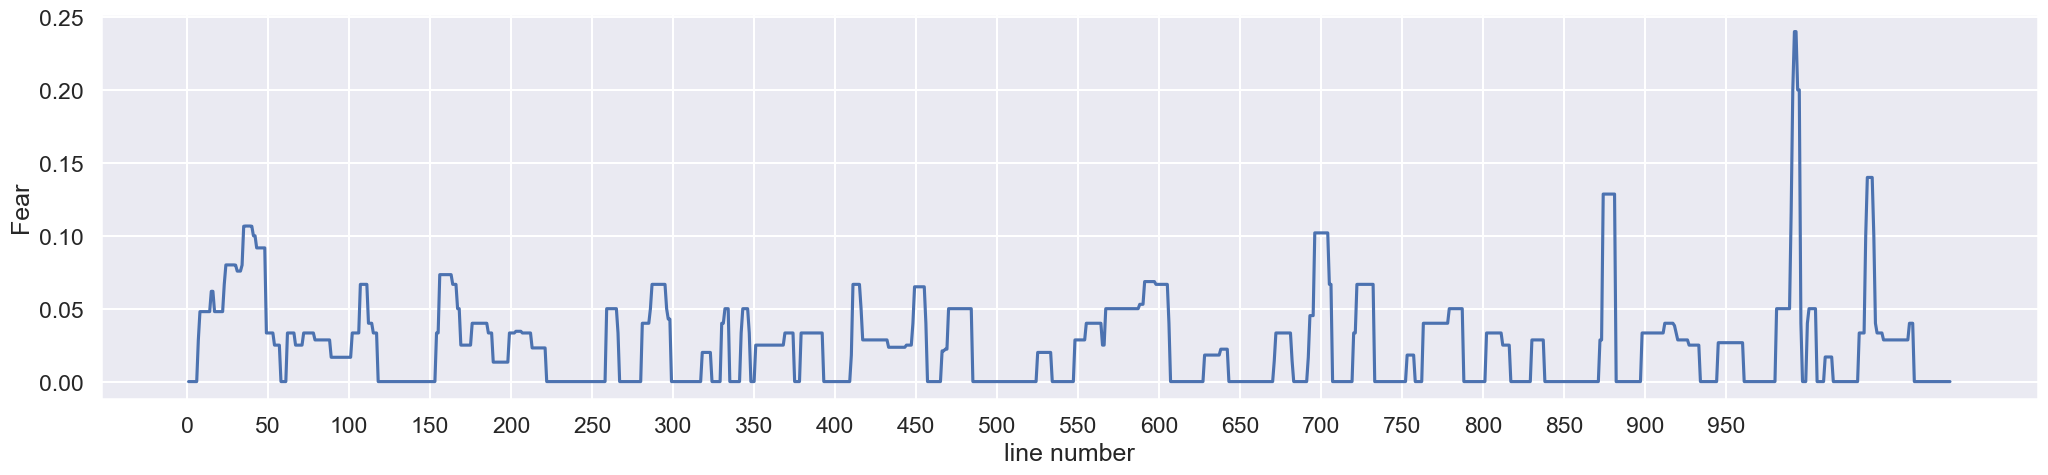

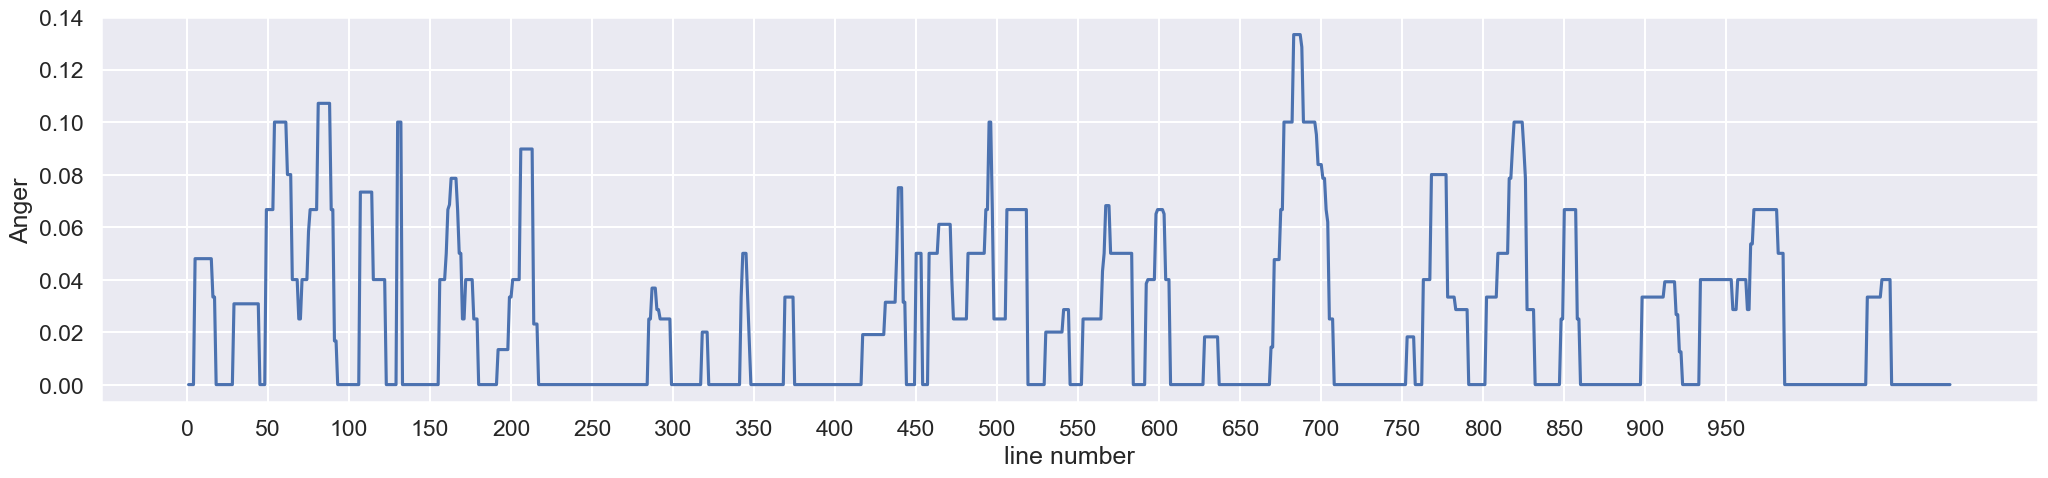

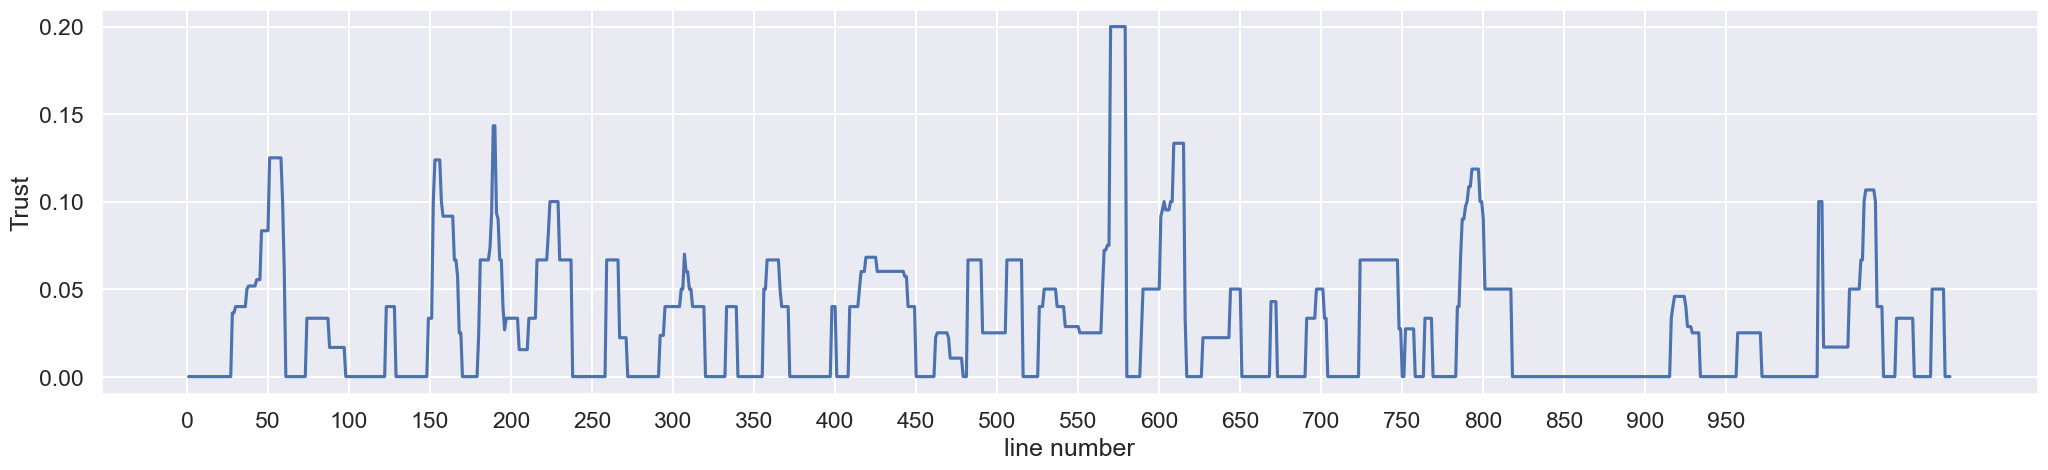

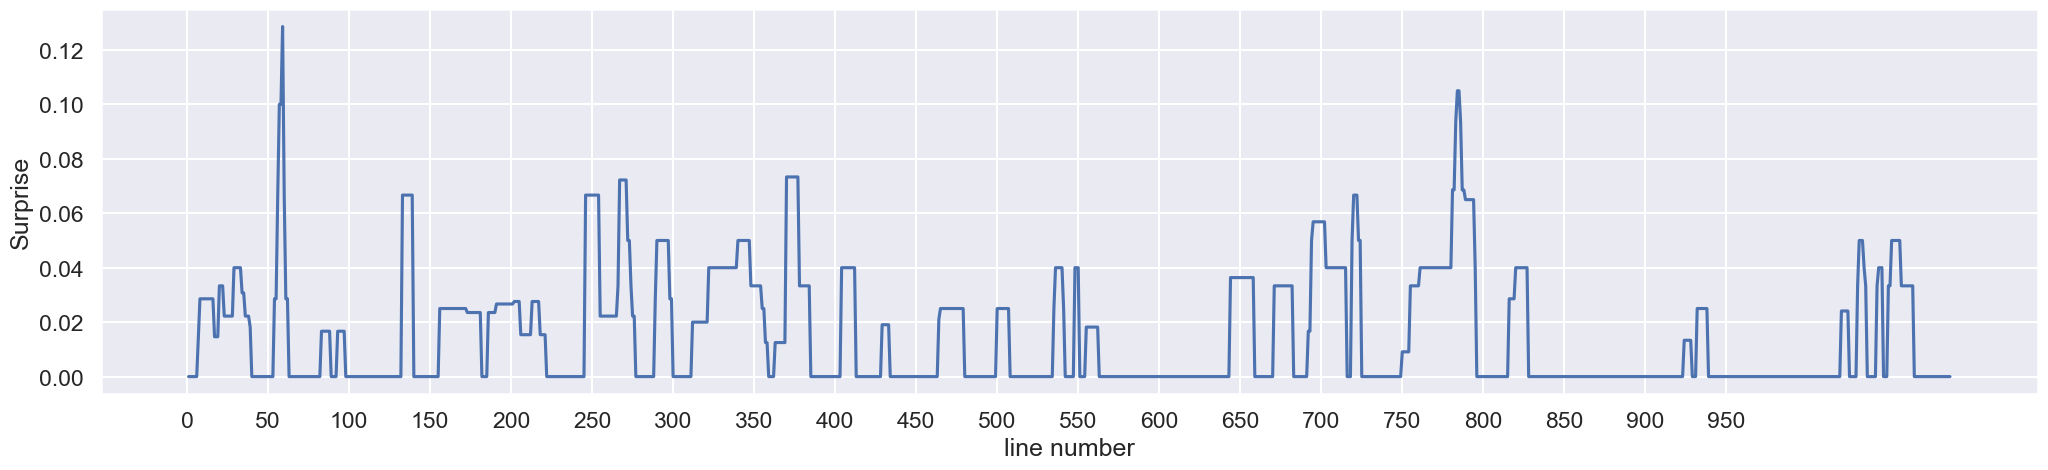

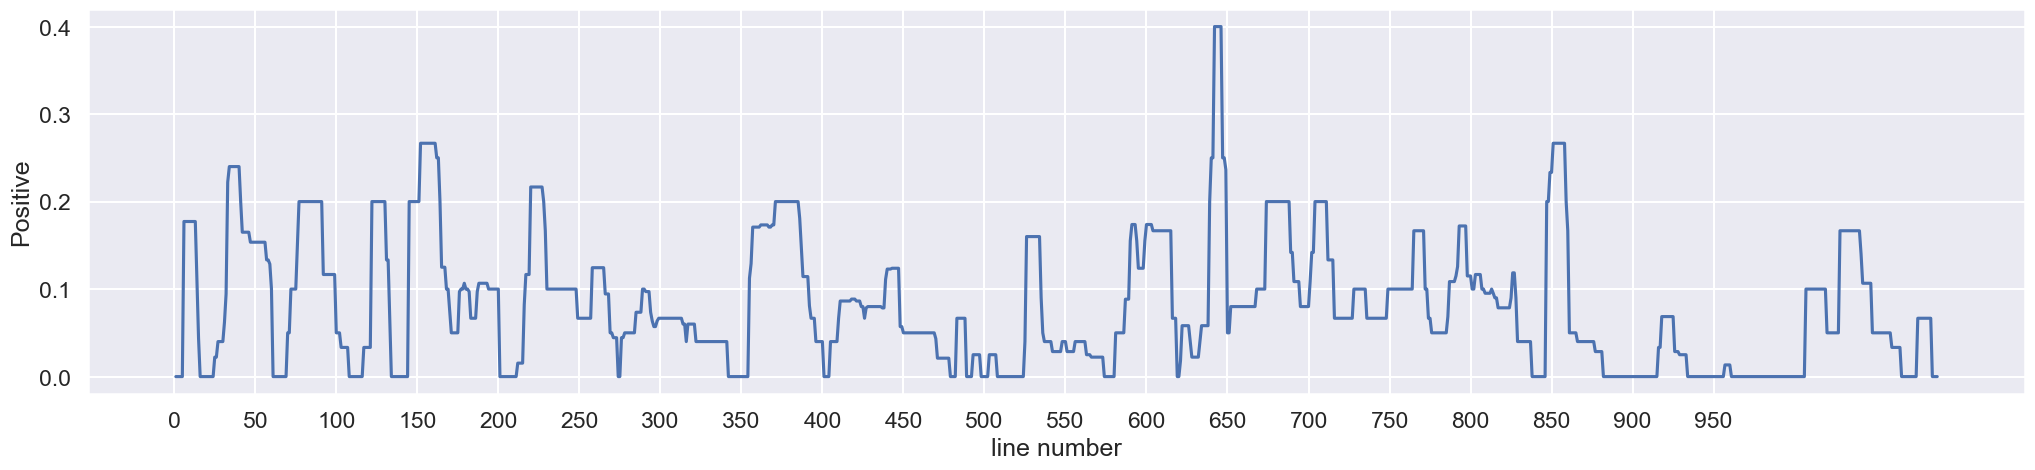

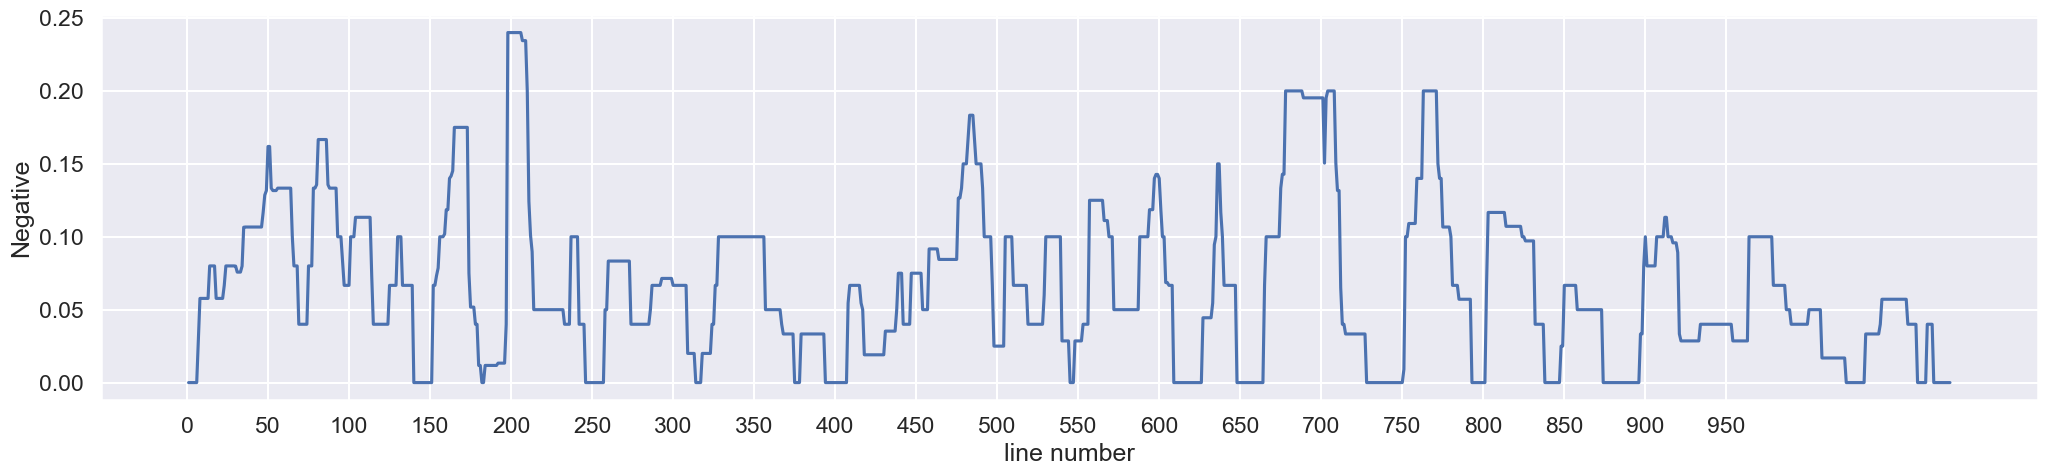

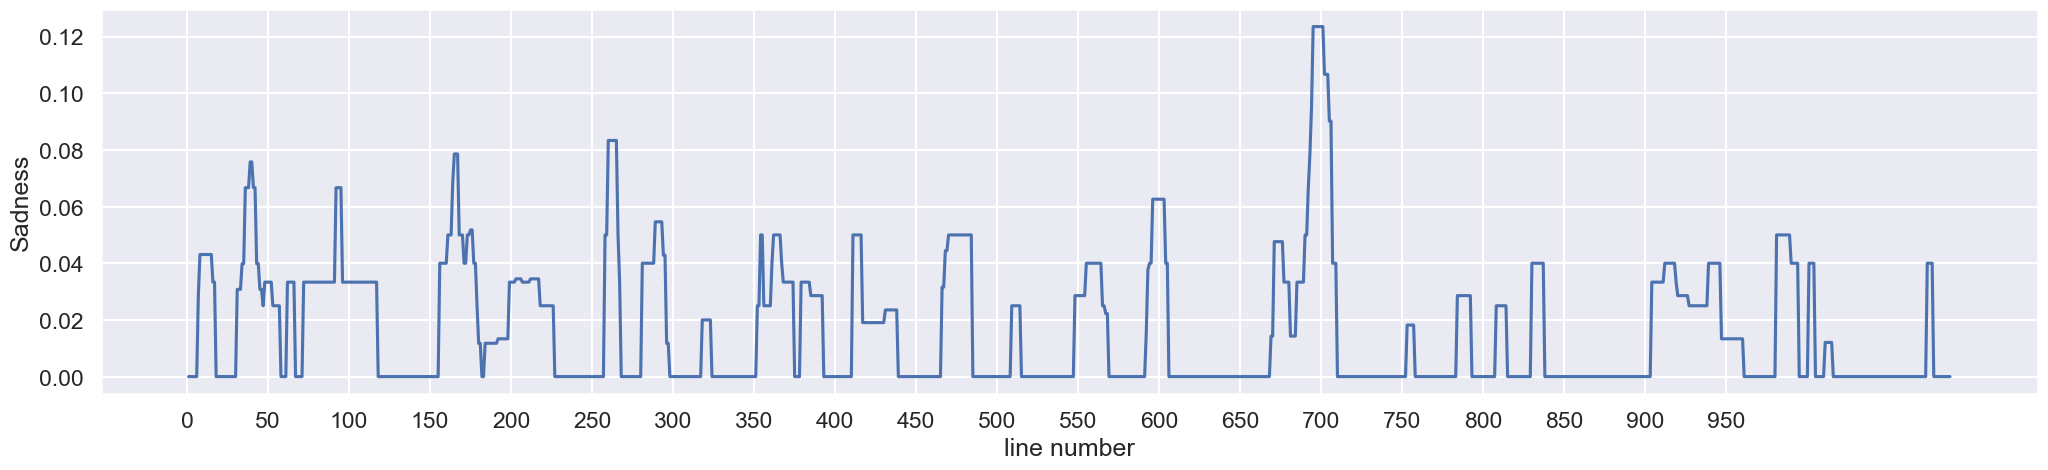

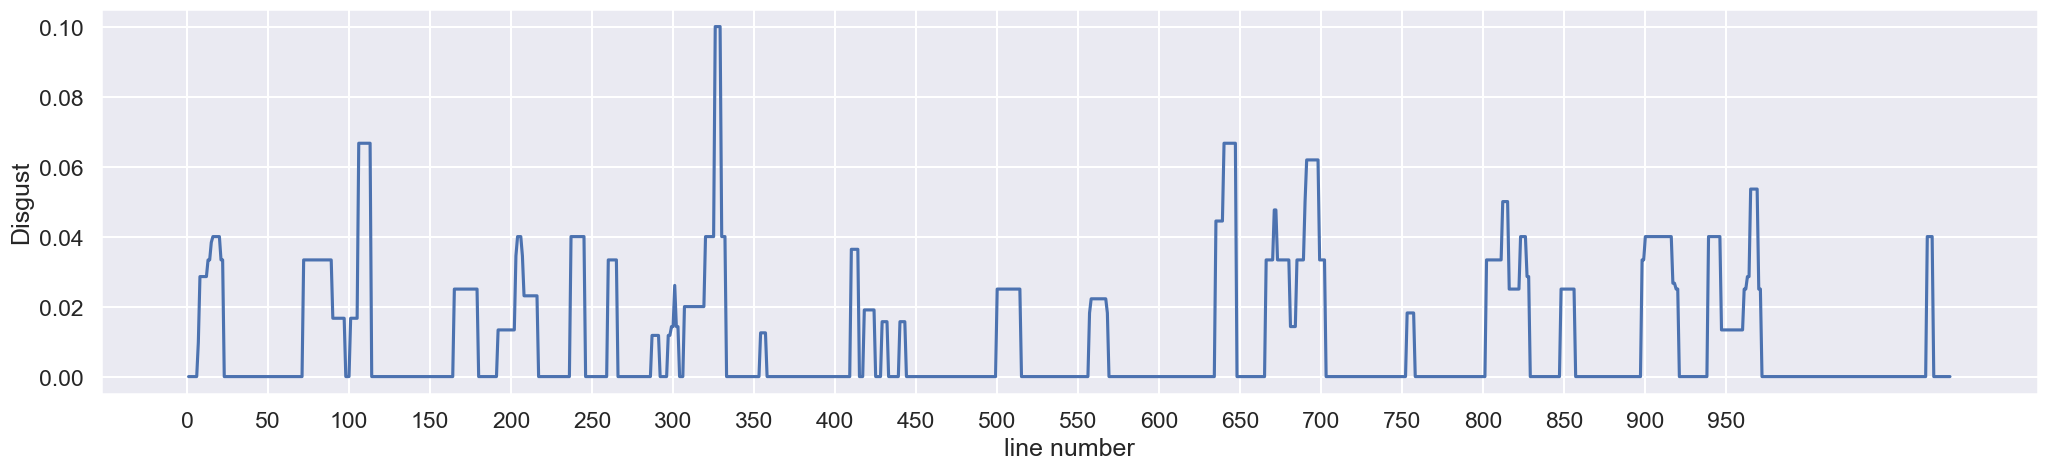

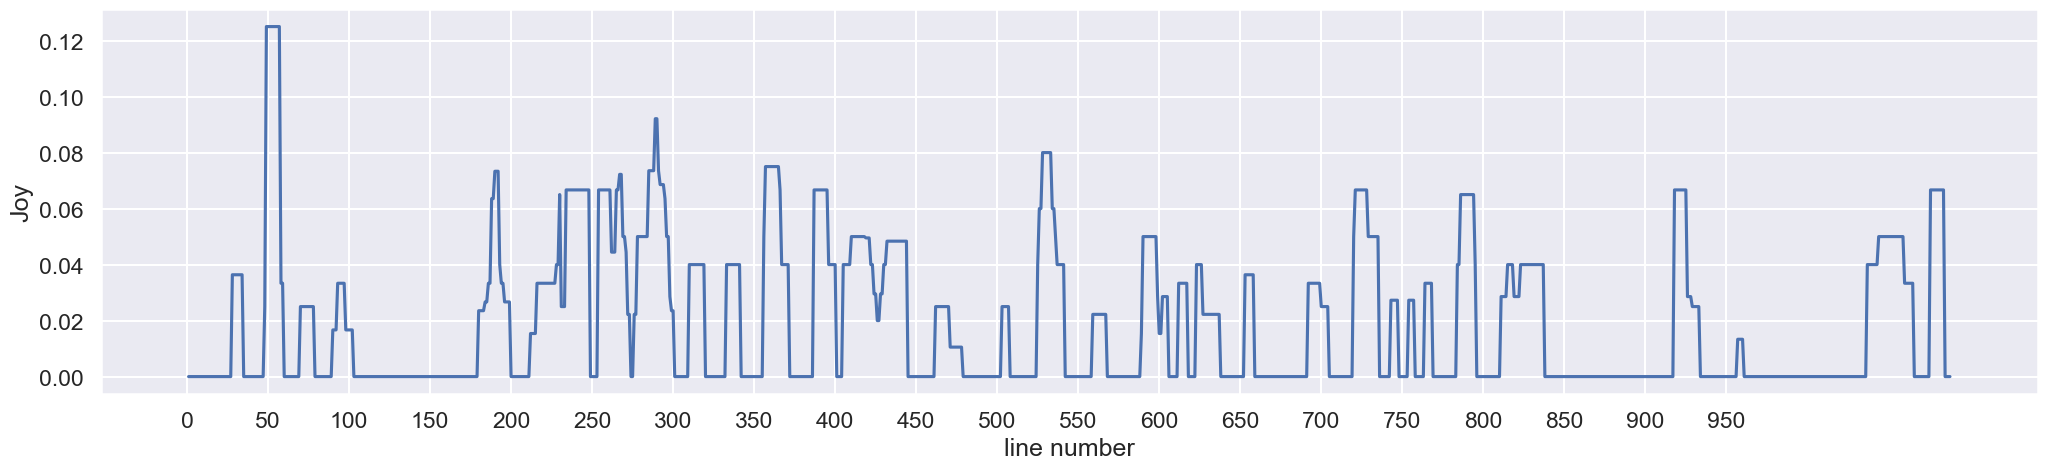

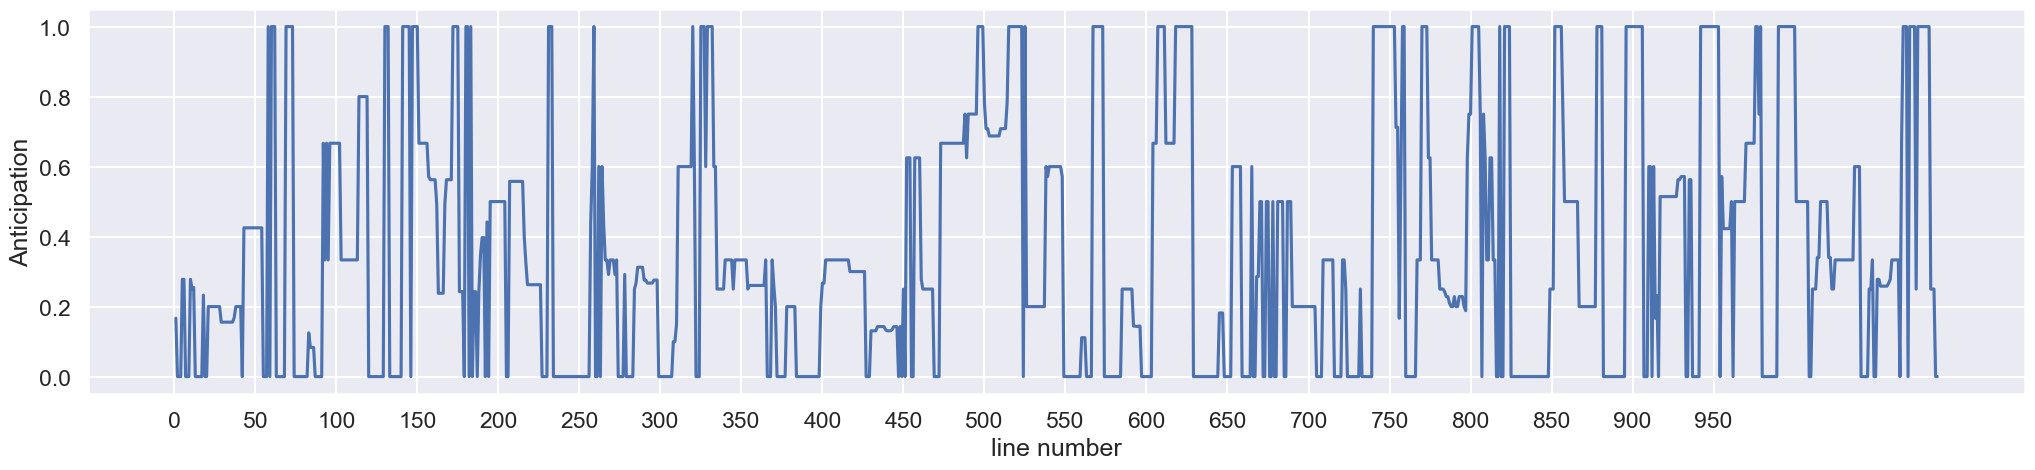

In [83]:
for i in range(27, 37):
    plt.figure(figsize=(25, 5))
    sns.set_context("talk", font_scale=1)
    plot = sns.lineplot(x = 'lineNum', y=nrc.columns[i], data=nrc)
    plt.xticks(np.arange(0, 1000, 50))
    plot.set_xlabel('line number')
    plt.show()

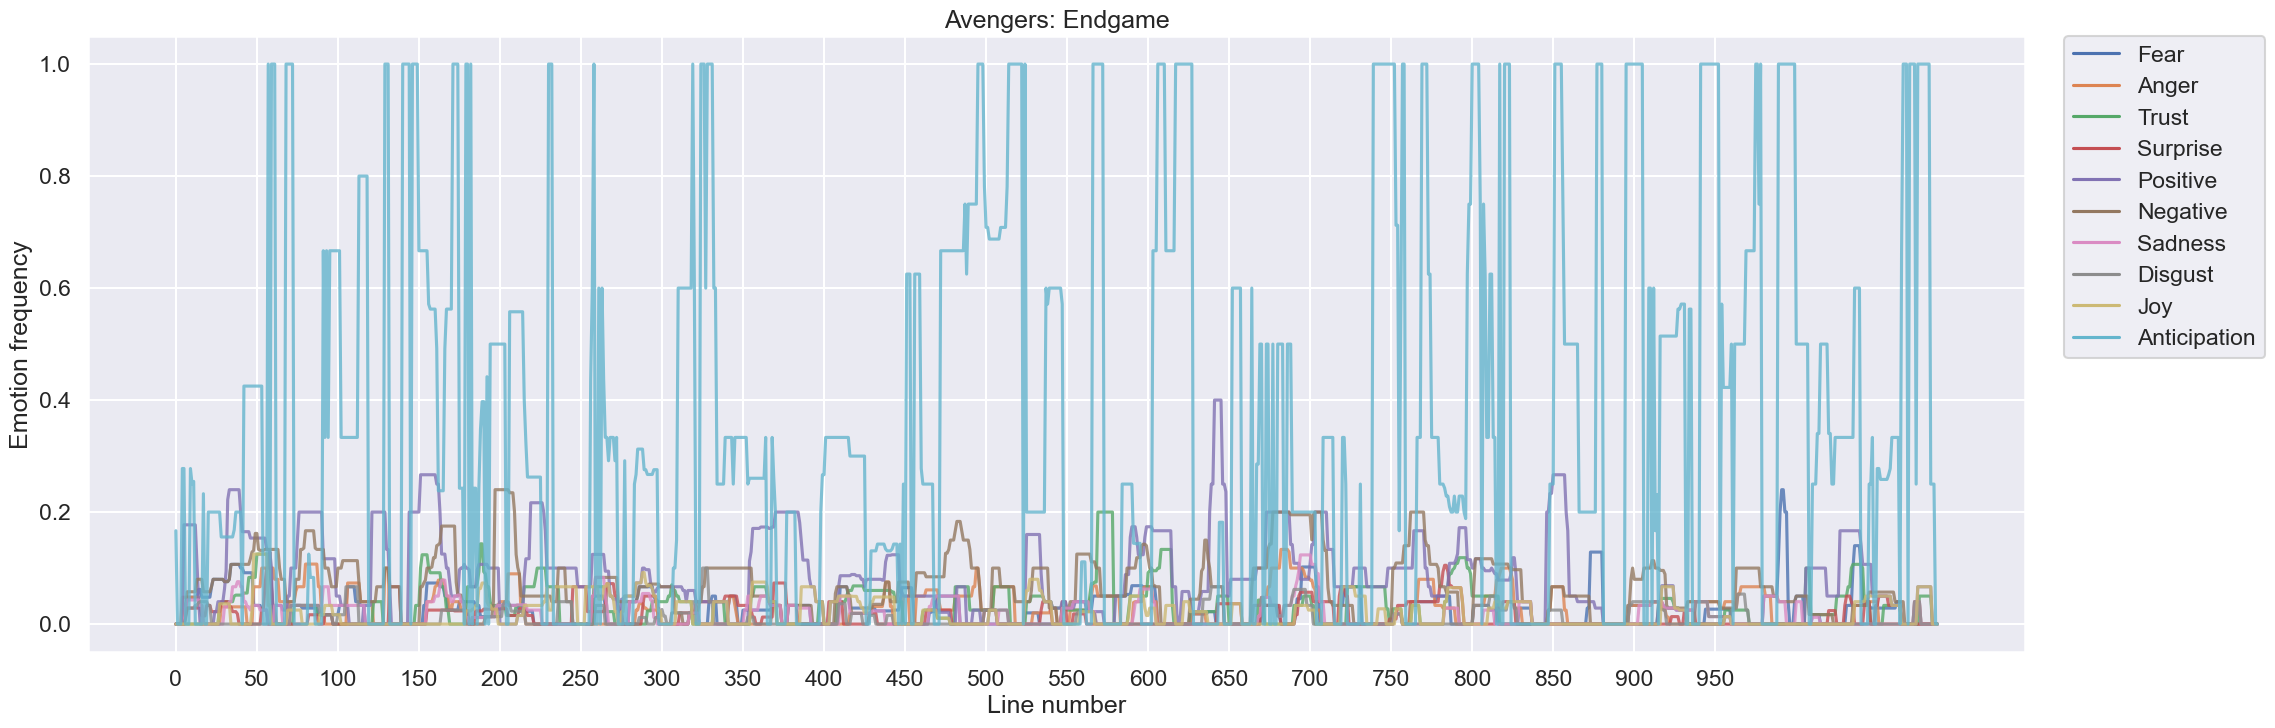

In [84]:
plt.figure(figsize=(25, 8))
sns.set_context("talk", font_scale=1)
sns.lineplot(data=nrc.iloc[:, 27:37], dashes=False, alpha=0.8)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(0, 1000, 50))
plt.xlabel('Line number')
plt.ylabel('Emotion frequency')
plt.title('Avengers: Endgame')
plt.show()
# plot.legend(loc='upper right')

## Whole movie

<AxesSubplot:title={'center':'Avengers: Endgame'}, xlabel='Emotion Frequency', ylabel='Emotion Classification'>

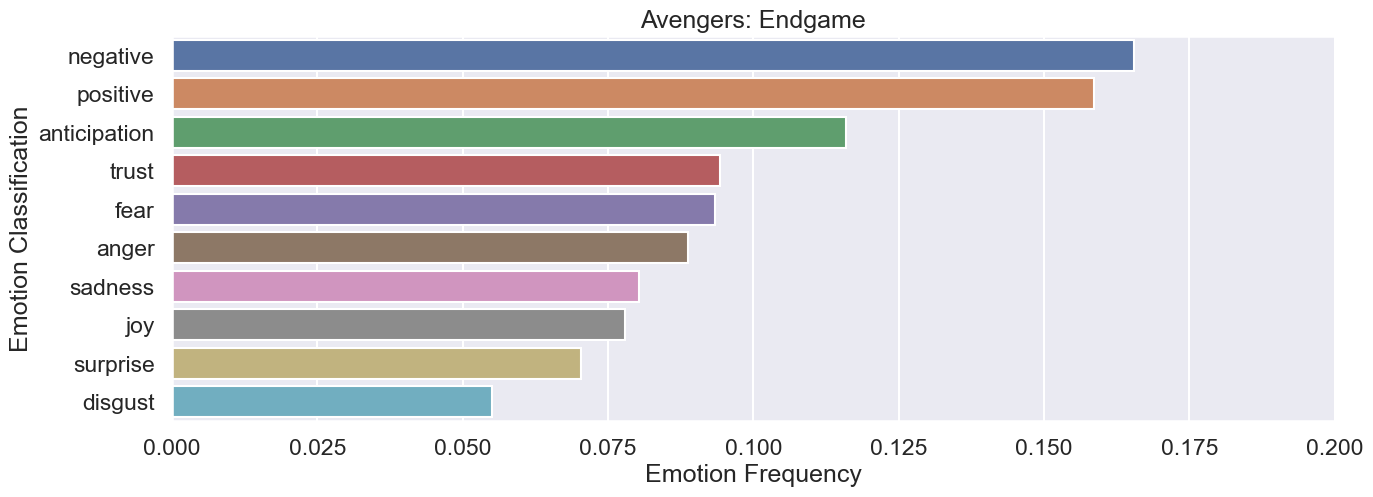

In [85]:
# Emotion frequencies for whole movie
all_line = " ".join(char_line for char_line in nrc['Lemma'])

all_line_text_object = NRCLex(all_line)

frequency_data = all_line_text_object.affect_frequencies
frequency_df = pd.DataFrame.from_dict(frequency_data, orient='index')
frequency_df = frequency_df.reset_index()
frequency_df = frequency_df.rename(columns={'index': 'Emotion Classification', 0:'Emotion Frequency'})
frequency_df = frequency_df.sort_values(by=['Emotion Frequency'], ascending=False)

frequency_df = frequency_df[frequency_df['Emotion Classification'] != 'anticip']



plt.figure(figsize=(15, 5))
plt.title('Avengers: Endgame')
plt.xlim([0, 0.2])
sns.set_context("talk", font_scale=0.5)
sns.barplot(x='Emotion Frequency', y='Emotion Classification', data=frequency_df)

<AxesSubplot:title={'center':'Avengers: Endgame'}, xlabel='Emotion Count', ylabel='Emotion Classification'>

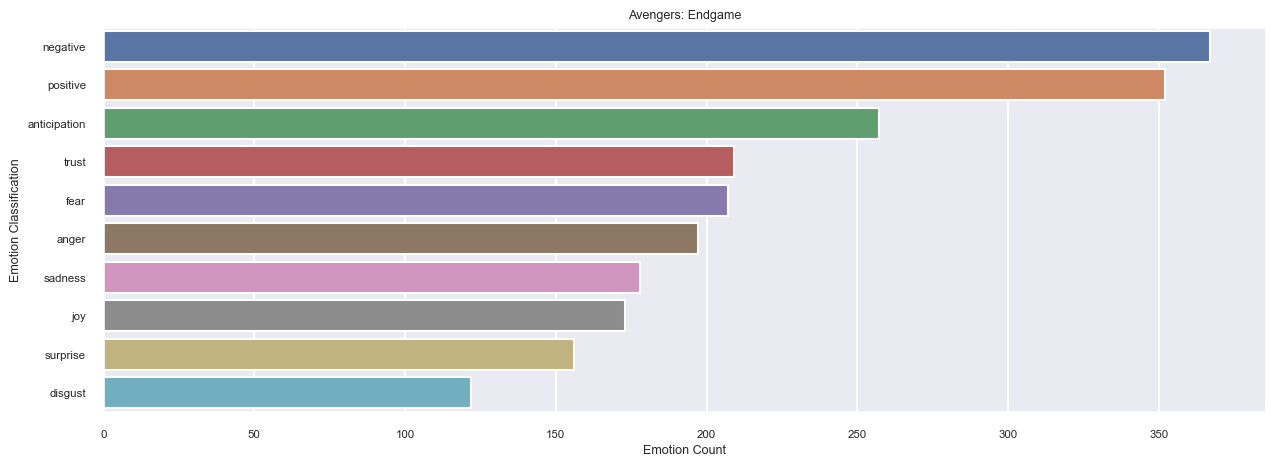

In [86]:
# Emotion frequencies for whole movie
all_line = " ".join(char_line for char_line in nrc['Lemma'])

all_line_text_object = NRCLex(all_line)

score_data = all_line_text_object.raw_emotion_scores
score_df = pd.DataFrame.from_dict(score_data, orient='index')
score_df = score_df.reset_index()
score_df = score_df.rename(columns={'index': 'Emotion Classification', 0:'Emotion Count'})
score_df = score_df.sort_values(by=['Emotion Count'], ascending=False)

score_df

plt.figure(figsize=(15, 5))
plt.title('Avengers: Endgame')
sns.set_context("talk", font_scale=1)
sns.barplot(x='Emotion Count', y='Emotion Classification', data=score_df)

In [87]:
# Export csv files
score_df.to_csv(r'/Users/ceciliali/Documents/MSc Data Science/Visual Analytics/coursework_marvel/endgameEmotion.csv',
              index=False)

## By characters

In [88]:
nrc.head()

lineNum     character                                               line  \
0        1  CLINT BARTON  Okay, you see where you’re going? Let’s work o...   
1        2   LILA BARTON                                         Why three?   
2        3  CLINT BARTON       ‘Cause two’s not enough and four’s too much-   
3        4  LAURA BARTON            You guys want mustard or mayo, or both?   
4        5   LILA BARTON                        Who puts mayo on a hot dog?   

                                          clean_line  \
0  Okay you see where youre going Lets work on ho...   
1                                          Why three   
2           Cause twos not enough and fours too much   
3              You guys want mustard or mayo or both   
4                         Who puts mayo on a hot dog   

                                          POS tagged  \
0  [(Okay, n), (see, v), (youre, n), (going, v), ...   
1                                    [(three, None)]   
2  [(Cause, n), (twos, v), (enough, a), (fours, v...   
3    [(guys, v), (want, a), (mustard, n), (mayo, n)]   
4         [(puts, v), (mayo, n), (hot, a), (dog, n)]   

                                               Lemma  \
0    Okay see youre go Lets work get Okay goodtip...   
1                                              three   
2                       Cause twos enough fours much   
3                              guy want mustard mayo   
4                                   put mayo hot dog   

                                text_object  fear  anger  trust  ...  Fear  \
0  <nrclex.NRCLex object at 0x7fbf84323c10>   0.0    0.0    0.0  ...   0.0   
1  <nrclex.NRCLex object at 0x7fbf84323d00>   0.0    0.0    0.0  ...   0.0   
2  <nrclex.NRCLex object at 0x7fbf84323850>   0.0    0.0    0.0  ...   0.0   
3  <nrclex.NRCLex object at 0x7fbf84323b20>   0.0    0.0    0.0  ...   0.0   
4  <nrclex.NRCLex object at 0x7fbf84323cd0>   0.0    1.0    0.0  ...   0.0   

      Anger  Trust  Surprise  Positive  Negative  Sadness  Disgust  Joy  \
0  0.000000    0.0       0.0       0.0       0.0      0.0      0.0  0.0   
1  0.000000    0.0       0.0       0.0       0.0      0.0      0.0  0.0   
2  0.000000    0.0       0.0       0.0       0.0      0.0      0.0  0.0   
3  0.000000    0.0       0.0       0.0       0.0      0.0      0.0  0.0   
4  0.047967    0.0       0.0       0.0       0.0      0.0      0.0  0.0   

   Anticipation  
0      0.166667  
1      0.000000  
2      0.000000  
3      0.000000  
4      0.277778  

[5 rows x 37 columns]

In [89]:
char_most_line = ['TONY STARK', 'THOR', 'THANOS', 'STEVE ROGERS', 'BRUCE BANNER', 'NATASHA ROMANOFF']

In [90]:
# Initiate dataframe
char_df = pd.DataFrame()

for char in char_most_line:
    all_line = nrc.loc[nrc['character'] == char]['Lemma']
    text_object = NRCLex(" ".join(line for line in all_line))
    
    score_data = text_object.affect_frequencies

    score_df = pd.DataFrame.from_dict(score_data, orient='index')
    score_df = score_df.reset_index()
    score_df = score_df.rename(columns={'index': 'Emotion Classification', 0:'Emotion Frequency'})
    score_df['character'] = char
    char_df = char_df.append(score_df, ignore_index=True)

In [91]:
char_df = char_df[char_df['Emotion Classification'] != 'anticip']

Text(0.5, 1.0, 'Avengers: Endgame')

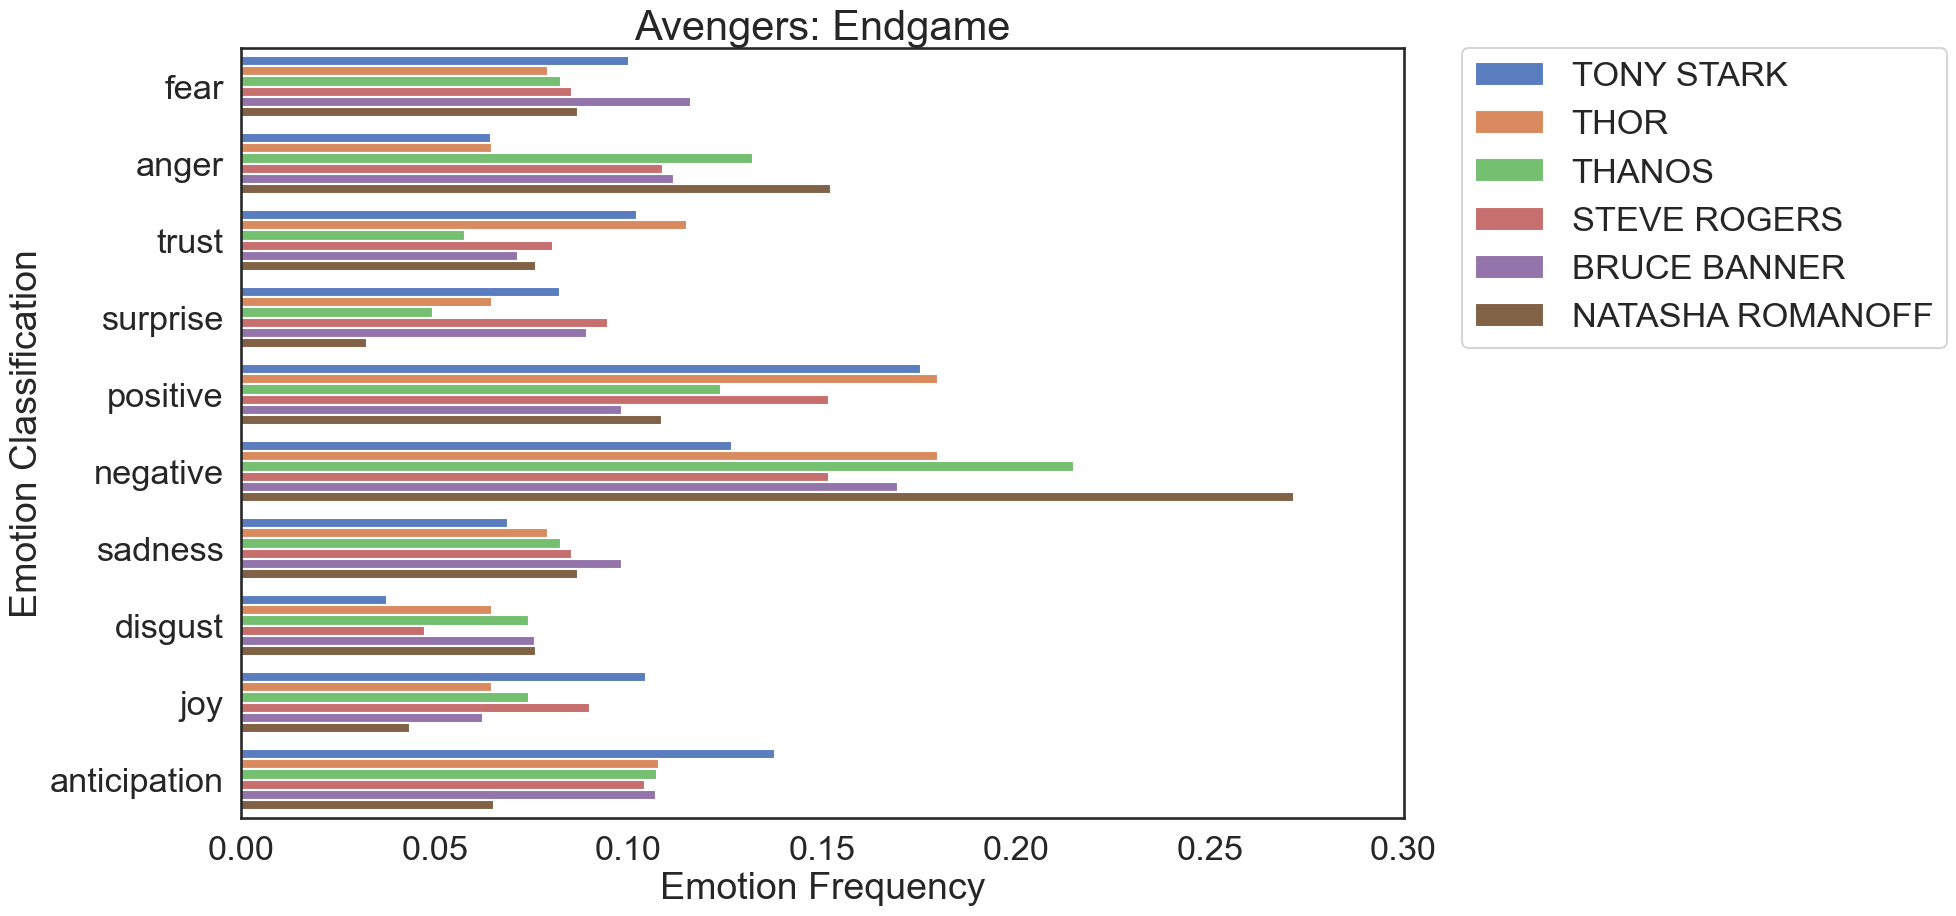

In [92]:
plt.figure(figsize=(15, 10))
sns.set_style("white")
sns.set_context("talk", font_scale=1.5)
sns.barplot(x='Emotion Frequency', y='Emotion Classification', palette='muted', hue='character', data=char_df)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([0, 0.3])
plt.title('Avengers: Endgame', fontsize=30)

In [93]:
# Export csv files
char_df.to_csv(r'/Users/ceciliali/Documents/MSc Data Science/Visual Analytics/coursework_marvel/endgameDF.csv',
              index=False)

# Test

In [94]:
for char in char_most_line:
    all_line = nrc.loc[nrc['character'] == char]['Lemma']
    all_line_sentence = " ".join(line for line in all_line)
    all_line_token = word_tokenize(all_line_sentence)
    allWordDist = nltk.FreqDist(w.lower() for w in all_line_token)
    mostCommon = allWordDist.most_common(10)
    print(char, ':\n', mostCommon)
#     score_data = text_object.affect_frequencies

#     score_df = pd.DataFrame.from_dict(score_data, orient='index')
#     score_df = score_df.reset_index()
#     score_df = score_df.rename(columns={'index': 'Emotion Classification', 0:'Emotion Frequency'})
#     score_df['character'] = char
#     char_df = char_df.append(score_df, ignore_index=True)

TONY STARK :
 [('go', 19), ('know', 19), ('time', 18), ('get', 18), ('youre', 16), ('right', 14), ('dont', 13), ('im', 13), ('say', 10), ('think', 10)]
THOR :
 [('im', 10), ('right', 8), ('one', 6), ('stop', 5), ('take', 5), ('talk', 5), ('like', 4), ('know', 4), ('dont', 4), ('think', 4)]
THANOS :
 [('stone', 8), ('im', 6), ('know', 5), ('do', 4), ('universe', 3), ('grateful', 3), ('daughter', 3), ('ive', 3), ('bring', 3), ('memory', 3)]
STEVE ROGERS :
 [('get', 19), ('go', 13), ('know', 11), ('dont', 10), ('tony', 10), ('okay', 8), ('one', 7), ('stone', 7), ('need', 6), ('im', 6)]
BRUCE BANNER :
 [('im', 12), ('get', 10), ('time', 9), ('know', 8), ('one', 8), ('back', 8), ('thanos', 7), ('stone', 7), ('like', 7), ('dont', 7)]
NATASHA ROMANOFF :
 [('go', 9), ('stone', 7), ('get', 7), ('im', 6), ('try', 5), ('right', 5), ('dont', 5), ('take', 4), ('youre', 4), ('come', 4)]


## N-gram

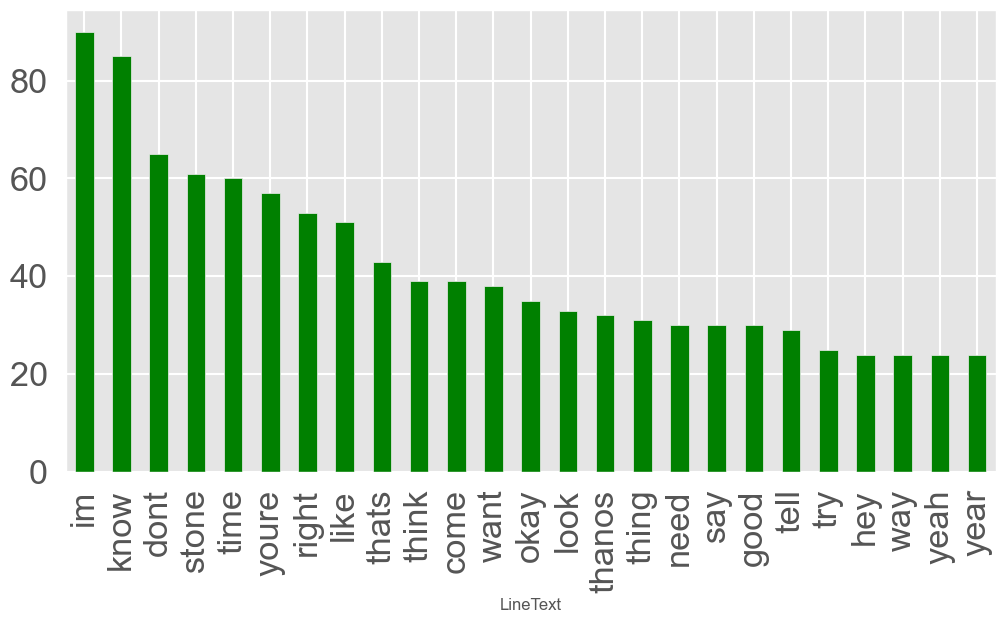

In [95]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

mpl.style.use('ggplot')
common_words = get_top_n_words(script['Lemma'], 25)
df1 = pd.DataFrame(common_words, columns = ['LineText' , 'count'])
plt.figure(figsize=(12,6))
df1.groupby('LineText').sum()['count'].sort_values(ascending=False).plot.bar(color='green')
plt.show()

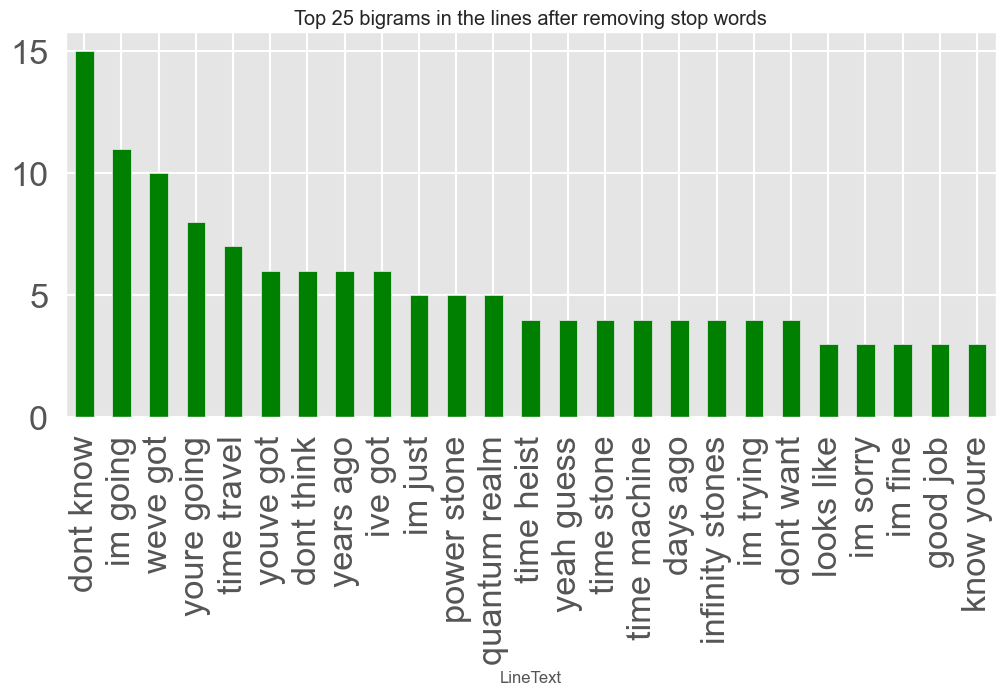

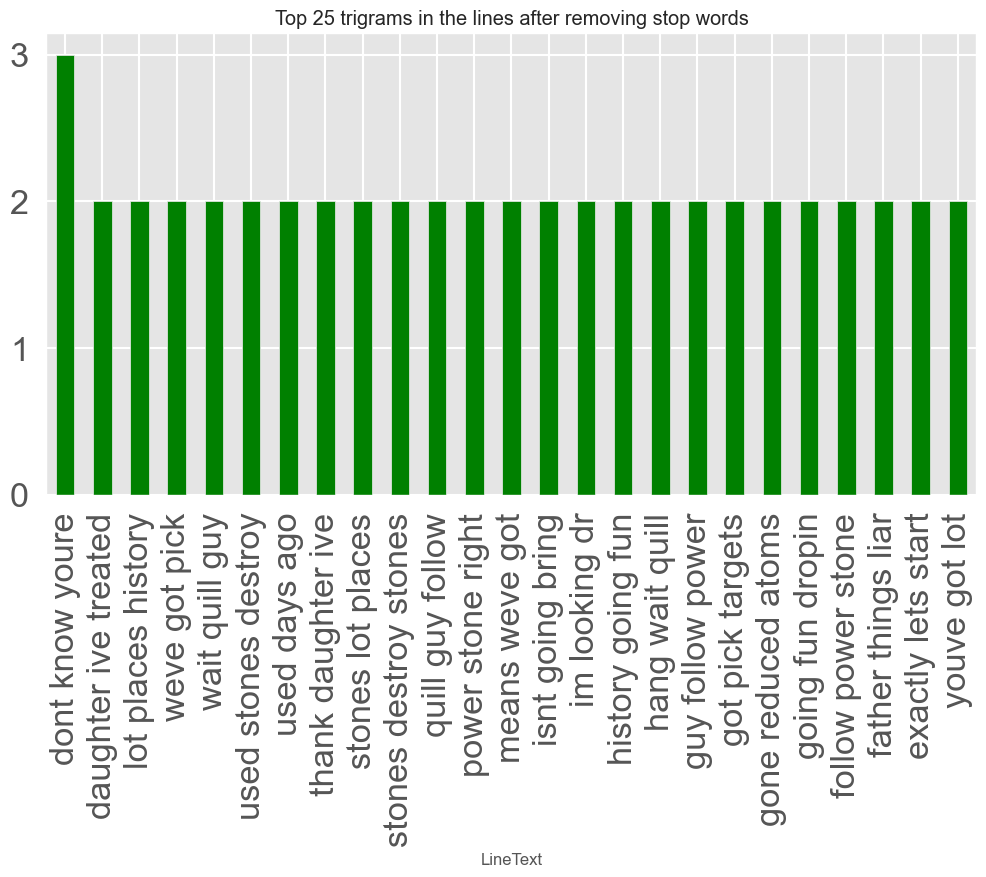

In [96]:
def get_top_k_n_gram(corpus, k=None, n=None):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:k]

common_bigrams = get_top_k_n_gram(script['clean_line'], 25,2)
df3 = pd.DataFrame(common_bigrams, columns = ['LineText' , 'count'])
plt.figure(figsize=(12,5))
df3.groupby('LineText').sum()['count'].sort_values(ascending=False).plot.bar(
    title='Top 25 bigrams in the lines after removing stop words',color='green')
plt.show()

common_trigrams = get_top_k_n_gram(script['clean_line'], 25,3)
df3 = pd.DataFrame(common_trigrams, columns = ['LineText' , 'count'])
plt.figure(figsize=(12,6))
df3.groupby('LineText').sum()['count'].sort_values(ascending=False).plot.bar(
    title='Top 25 trigrams in the lines after removing stop words',color='green')
plt.show()